In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from collections import defaultdict
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multitest import multipletests

from scipy.stats import shapiro, levene, rankdata, linregress, kruskal

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

import helper

In [86]:
root0="~/scratch/non_detailed_save/diff_rules/"
root1="~/CA_GRN_results/non_detailed_save/extra_inputs/"
root2="~/CA_GRN_results/non_detailed_save/"
root3="~/CA_GRN_results/detailed_save/"

season_len = 300
#seed_intss = [[69904,149796],[4147842,1238860],[1677032,1410667],[2607162,1754028],[286634,159689],[2961036,153075],[3430997,2634107]]
seed_intss=[69904,149796,4147842,1238860,1677032,1410667,2607162,1754028,286634,159689,2961036,153075,3430997,2634107]
metric = "maxfits"
num_cells = 22
dev_steps = 22
grn_size = 22
geneid = 1
num_reps = 15

avexs = []
aveys = []
#rules = [22, 126, 154, 18, 122, 70,54,94,30,50,62,110,90,150,102]
rules=[[22,18],[154,126],[122,70],[54,94],[30,62],[110,90],[150,102]]

ones_1=[]
ones_2=[]
perc_overlaps=[]
stat_end_1 = []
stat_end_2 = []

pop = np.random.randn(1000, grn_size+2, grn_size).astype(np.float64)

data = []
ave_pss=[]
ave_rand = []
for rule in rules:
    for idx, seed_int in enumerate(seed_intss):

        #Info about target
        start_patternA = helper.seedID2string(seed_int, num_cells)
        #start_patternB = helper.seedID2string(seed_ints[1], num_cells)
        targetA = helper.rule2targets_wrapped_wstart(rule[0], L=dev_steps+1, N=num_cells, start_pattern=start_patternA)
        targetB = helper.rule2targets_wrapped_wstart(rule[1], L=dev_steps+1, N=num_cells, start_pattern=start_patternA)

        #Random success
        _,_, rand_fitnesses1 = helper.get_pop_TPF(pop, 1000, num_cells, grn_size, dev_steps, geneid, rule[0], seed_int,seed_int)
        _,_, rand_fitnesses2 = helper.get_pop_TPF(pop, 1000, num_cells, grn_size, dev_steps, geneid, rule[1], seed_int,seed_int)

        #ave_rand.append((sum(rand_fitnesses1)/len(rand_fitnesses1) + sum(rand_fitnesses2)/len(rand_fitnesses2))/2)
        ave_rand.append((max(rand_fitnesses1) + max(rand_fitnesses2))/2)


        ones_1.append(sum(targetA).sum()/(num_cells*(dev_steps+1)))
        ones_2.append(sum(targetB).sum()/(num_cells*(dev_steps+1)))
        where_overlap = np.where(targetA==targetB)
        perc_overlaps.append(len(targetA[where_overlap])/(22*23))

        if idx < 2:
            root=root3
        elif idx == 2 or idx == 3:
            root=root2
        else:
            root=root1
        
        print(rule, seed_int)
        vari_maxs, env1_maxs, env2_maxs=helper.get_fits_dr(rule, seed_int, metric, root0, root, season_len, num_reps, id_start = 0)
        vari_maxs=[v[:9600] for v in vari_maxs]
        env1_maxs=[v[:9600] for v in env1_maxs]
        env2_maxs=[v[:9600] for v in env2_maxs]
        if metric == "geno_stds":
            vari_maxs=[v[9000:] for v in vari_maxs]
            env1_maxs=[v[9000:] for v in env1_maxs]
            env2_maxs=[v[9000:] for v in env2_maxs]
        
        stat_end_1.append(np.array(env1_maxs)[:,-1].mean())
        stat_end_2.append(np.array(env2_maxs)[:,-1].mean())
    
        d,c,ps,lists = helper.scatter_value(vari_maxs, env1_maxs, env2_maxs, season_len=300)
        for i in range(num_reps): #list1, list2, static1, static2
            data.append({'CA': str(rule), 'Seed': str(seed_int), 'Env': "vari1", 'Val': lists[0][i]})
            data.append({'CA': str(rule), 'Seed': str(seed_int), 'Env': "vari2", 'Val': lists[1][i]})
            data.append({'CA': str(rule), 'Seed': str(seed_int), 'Env': "static1", 'Val': lists[2][i]})
            data.append({'CA': str(rule), 'Seed': str(seed_int), 'Env': "static2", 'Val': lists[3][i]})

        ave_pss.append(ps)
        avexs.append(d[0])
        aveys.append(d[1])
df = pd.DataFrame(data)

[22, 18] 69904
[22, 18] 149796
[22, 18] 4147842
[22, 18] 1238860
[22, 18] 1677032
[22, 18] 1410667
[22, 18] 2607162
[22, 18] 1754028
[22, 18] 286634
[22, 18] 159689
[22, 18] 2961036
[22, 18] 153075
[22, 18] 3430997
[22, 18] 2634107
[154, 126] 69904
[154, 126] 149796
[154, 126] 4147842
[154, 126] 1238860
[154, 126] 1677032
[154, 126] 1410667
[154, 126] 2607162
[154, 126] 1754028
[154, 126] 286634
[154, 126] 159689
[154, 126] 2961036
[154, 126] 153075
[154, 126] 3430997
[154, 126] 2634107
[122, 70] 69904
[122, 70] 149796
[122, 70] 4147842
[122, 70] 1238860
[122, 70] 1677032
[122, 70] 1410667
[122, 70] 2607162
[122, 70] 1754028
[122, 70] 286634
[122, 70] 159689
[122, 70] 2961036
[122, 70] 153075
[122, 70] 3430997
[122, 70] 2634107
[54, 94] 69904
[54, 94] 149796
[54, 94] 4147842
[54, 94] 1238860
[54, 94] 1677032
[54, 94] 1410667
[54, 94] 2607162
[54, 94] 1754028
[54, 94] 286634
[54, 94] 159689
[54, 94] 2961036
[54, 94] 153075
[54, 94] 3430997
[54, 94] 2634107
[30, 62] 69904
[30, 62] 149796

In [87]:
df

,CA,Seed,Env,Val
0,"[22, 18]",69904,vari1,0.840909
1,"[22, 18]",69904,vari2,0.857438
2,"[22, 18]",69904,static1,0.861491
3,"[22, 18]",69904,static2,0.863432
4,"[22, 18]",69904,vari1,0.871792
...,...,...,...,...
5875,"[150, 102]",2634107,static2,0.684255
5876,"[150, 102]",2634107,vari1,0.652854
5877,"[150, 102]",2634107,vari2,0.675601
5878,"[150, 102]",2634107,static1,0.653708


In [88]:
len(data)/15/98

4.0

In [35]:
def quick_plot(xs,ys,myxlab, myylab):
    plt.scatter(xs,ys)
    slope, intercept, r_value, p_value, std_err = linregress(xs, ys)
    x_fit = np.linspace(min(xs), max(xs), 100)
    y_fit = slope * x_fit + intercept
    #plt.plot(x_fit, y_fit, color='red', linestyle='--', label=f'Fit: y = {slope:.2f}x + {intercept:.2f}')
    plt.xlabel(myxlab)
    plt.ylabel(myylab)
    # r_value: The Pearson correlation coefficient. The square of rvalue is equal to the coefficient of determination (R^2).
    print("slope: ", slope, "R-squared: ", r_value**2, "P: ", p_value)
    plt.show()

slope:  -0.02910337559780186 R-squared:  0.01574988019478063 P:  0.21820828190232677


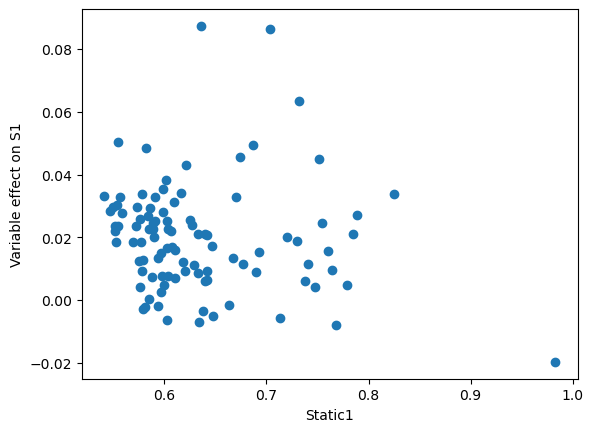

slope:  -0.14672099087559884 R-squared:  0.3410179765978317 P:  2.7607721565178895e-10


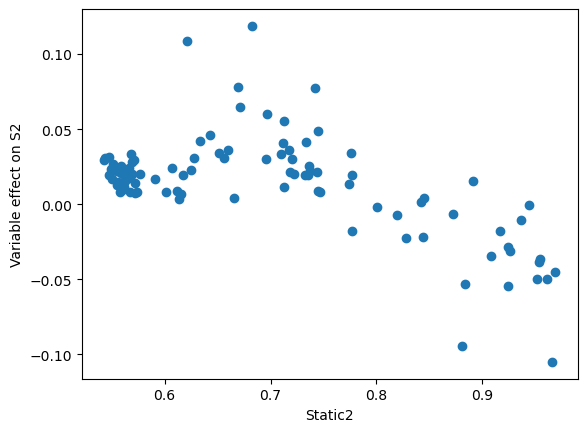

slope:  -0.19947597689527033 R-squared:  0.5117635561802738 P:  1.274255021870186e-16


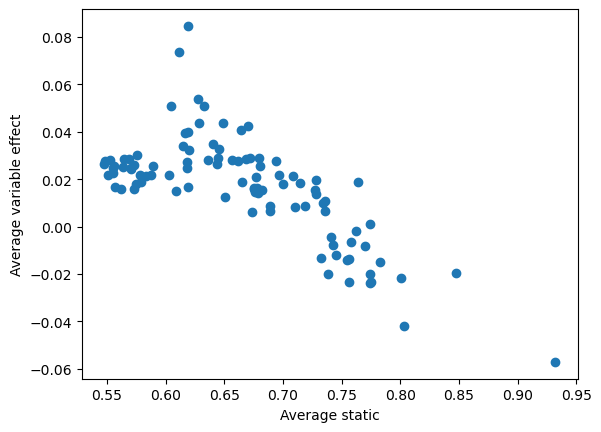

slope:  -0.12091264562462609 R-squared:  0.3525338682522037 P:  1.1659918970072637e-10


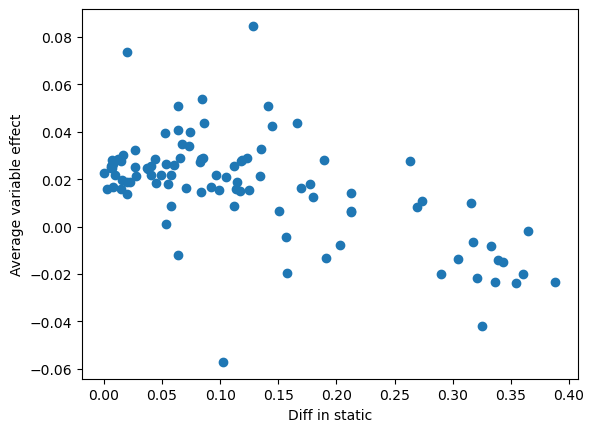

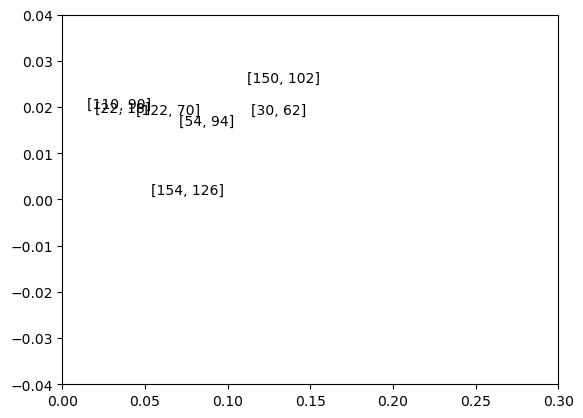

slope:  -0.19468351556588165 R-squared:  0.2839257205937454 P:  1.6237187085707143e-08


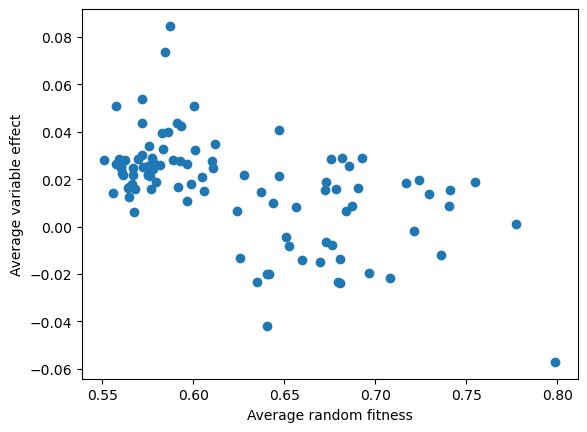

In [5]:
#plt.scatter(ones_1, aveys)
#plt.xlabel("Percentage of cells that are 1 for env 1")
#plt.ylabel("Static env 1 final fitness")
#plt.show() #NO RELATIONSHIP, any combo of ones_1, ones_2, static, aveys, avexy

#quick_plot(abs(np.array(ones_2[:15])-np.array(ones_1[:15])),np.array(avexs[:15])+np.array(aveys[:15]), myxlab="Difference in percentage of 1s between envs", myylab="Vari env 2d scatter x val")
#No relationship
#quick_plot(abs(np.array(ones_2[15:])-np.array(ones_1[15:])),np.array(avexs[15:])+np.array(aveys[15:]), myxlab="Difference in percentage of 1s between envs", myylab="Vari env 2d scatter x val")
#No relationship

#quick_plot(perc_overlaps,np.array(avexs)+np.array(aveys), myxlab="Difference in percentage of 1s between envs", myylab="Vari env 2d scatter x val")
#quick_plot(perc_overlaps[:15],np.array(avexs[:15])+np.array(aveys[:15]), myxlab="Difference in percentage of 1s between envs", myylab="Vari env 2d scatter x val")
#quick_plot(perc_overlaps[15:],np.array(avexs[15:])+np.array(aveys[15:]), myxlab="Difference in percentage of 1s between envs", myylab="Vari env 2d scatter x val")
#No relationship anywhere

quick_plot(np.array(stat_end_1),np.array(avexs), myxlab="Static1", myylab="Variable effect on S1")
quick_plot(np.array(stat_end_2),np.array(aveys), myxlab="Static2", myylab="Variable effect on S2")


#the higher the average fitness of the static, the lower the fitness gain from the variability
quick_plot((np.array(stat_end_1)+np.array(stat_end_2))/2,(np.array(aveys)+np.array(avexs))/2, myxlab="Average static", myylab="Average variable effect")
#No relationship

quick_plot(np.abs(np.array(stat_end_1)-np.array(stat_end_2)),(np.array(avexs)+np.array(aveys))/2, myxlab="Diff in static", myylab="Average variable effect")
#No relationship
x=np.abs(np.array(stat_end_1)-np.array(stat_end_2))
y=(np.array(avexs)+np.array(aveys))/2
for idx,r in enumerate(rules):
    plt.text(x[idx],y[idx], label=r,s=r)
plt.ylim(-0.04,0.04)
plt.xlim(0,0.3)
plt.show()

quick_plot(ave_rand,(np.array(avexs)+np.array(aveys))/2, myxlab="Average random fitness", myylab="Average variable effect")
#Relationship!


            CA     Seed Group       Val
0    [110, 90]  1238860  stat  0.571011
1    [110, 90]  1238860  vari  0.595687
2    [110, 90]  1410667  stat  0.588578
3    [110, 90]  1410667  vari  0.610412
4    [110, 90]   149796  stat  0.621138
..         ...      ...   ...       ...
191   [54, 94]  3430997  vari  0.783787
192   [54, 94]  4147842  stat  0.747202
193   [54, 94]  4147842  vari  0.739380
194   [54, 94]    69904  stat  0.849282
195   [54, 94]    69904  vari  0.829844

[196 rows x 4 columns]


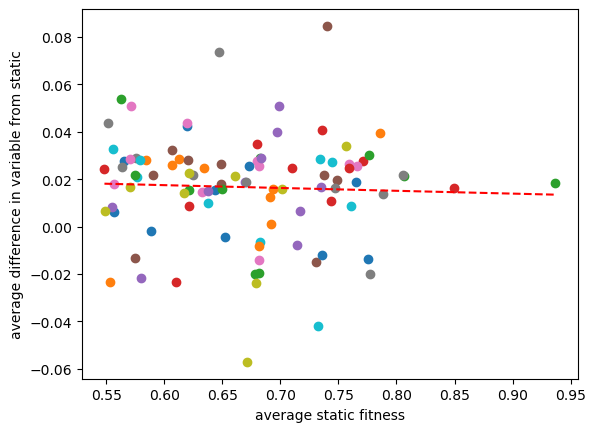

-0.04329972685423444 0.6720440774831078


In [6]:
df['Group'] = df['Env'].apply(lambda x: 'vari' if 'vari' in x else ('stat' if 'stat' in x else 'other'))
dfnew=df#df[df["Seed"]==str(seed_intss[0])]
dfnew=dfnew.groupby(['CA', 'Seed','Group'])['Val'].mean().reset_index()
print(dfnew)
c=0
xs=[]
ys=[]
for s in seed_intss:
    for r in rules:
        x=dfnew[(dfnew["CA"]==str(r)) & (dfnew["Seed"]==str(s)) & (dfnew["Group"]=="stat")].Val.to_list()[0]
        #y=dfnew[(dfnew["CA"]==str(r)) & (dfnew["Group"]=="vari")].Val.to_list()[0]
        y=(avexs[c]+aveys[c])/2
        plt.scatter(x,y)
        xs.append(x)
        ys.append(y)
        c+=1
slope, intercept, r_value, p_value, std_err = linregress(xs, ys)
x_fit = np.linspace(min(xs), max(xs), 100)
y_fit = slope * x_fit + intercept
plt.plot(x_fit, y_fit, color='red', linestyle='--', label=f'Fit: y = {slope:.2f}x + {intercept:.2f}')
plt.ylabel("average difference in variable from static")
plt.xlabel("average static fitness")
plt.show()
print(r_value,p_value)

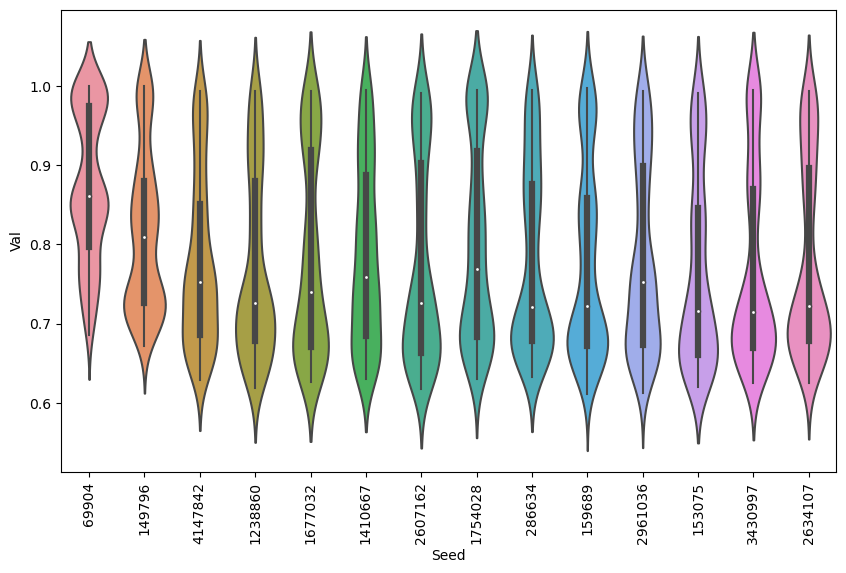

In [90]:
temp_df = df[(df["Env"]=="static") | (df["Env"]=="vari")]
#temp_df = df[(df["Env"]=="vari1") | (df["Env"]=="vari2")]
#temp_df = df[df['Seed'].isin([str(i) for i in seed_intss[1:]])]
fig, ax = plt.subplots(figsize=(10, 6))
#temp_df.boxplot(column='Val', by=['Env','CA'], ax=ax, grid=False)
sns.violinplot(data=temp_df,x="Seed",y="Val")
plt.xticks(rotation=90)
plt.show()

In [89]:
df["Env"] = df["Env"].replace({"static1": "static", "static2": "static"})
df["Env"] = df["Env"].replace({"vari1": "vari", "vari2": "vari"})

df

,CA,Seed,Env,Val
0,"[22, 18]",69904,vari,0.840909
1,"[22, 18]",69904,vari,0.857438
2,"[22, 18]",69904,static,0.861491
3,"[22, 18]",69904,static,0.863432
4,"[22, 18]",69904,vari,0.871792
...,...,...,...,...
5875,"[150, 102]",2634107,static,0.684255
5876,"[150, 102]",2634107,vari,0.652854
5877,"[150, 102]",2634107,vari,0.675601
5878,"[150, 102]",2634107,static,0.653708


In [91]:
data_groups=[]
#for r in rules:
for s in seed_intss:
    tl = temp_df[temp_df["Seed"]==str(s)].Val.to_list()
    data_groups.append(tl)

data_groups=[]
for t in list(set(temp_df["Env"].to_list())):
    tl = temp_df[temp_df["Env"]==str(t)].Val.to_list()
    data_groups.append(tl)

In [92]:
list(set(temp_df["Env"].to_list()))

['static', 'vari']

In [93]:
print("Shapiro-Wilk Test for Normality:")
for i, group in enumerate(data_groups, start=1):
    stat, p = shapiro(group)
    print(f"Group {i}: W={stat:.3f}, p={p:.3f}")
    if p > 0.05:
        print(f"  Group {i} follows a normal distribution (p > 0.05).")
    else:
        print(f"  Group {i} does not follow a normal distribution (p ≤ 0.05).")

print("\nLevene's Test for Homogeneity of Variances:")
stat, p = levene(*data_groups)
print(f"Levene's statistic={stat:.3f}, p={p:.3f}")
if p > 0.05:
    print("Variances are homogeneous (p > 0.05).")
else:
    print("Variances are not homogeneous (p ≤ 0.05).")


Shapiro-Wilk Test for Normality:
Group 1: W=0.902, p=0.000
  Group 1 does not follow a normal distribution (p ≤ 0.05).
Group 2: W=0.897, p=0.000
  Group 2 does not follow a normal distribution (p ≤ 0.05).

Levene's Test for Homogeneity of Variances:
Levene's statistic=3.030, p=0.082
Variances are homogeneous (p > 0.05).


In [94]:
len(data_groups[0])

2940

0.7926844017153183
0.7813624558329756


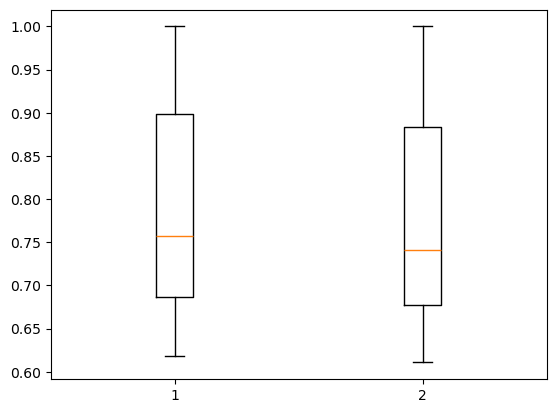

In [95]:
plt.boxplot(data_groups)
print(sum(data_groups[0])/len(data_groups[0])) #variable
print(sum(data_groups[1])/len(data_groups[1])) #static, 0.02 vs 0.01

In [98]:
stat, p = kruskal(*data_groups)
p

1.9866349438188216e-05

In [99]:
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

f_oneway(*data_groups)
#ttest_ind(*data_groups)

F_onewayResult(statistic=13.450797927643993, pvalue=0.00024706662447326064)

In [56]:
data = temp_df.copy()
data = data.rename(columns={"CA": "Factor_A", "Env": "Factor_B", "Val":"Response"})

In [57]:
data["Mean_A"] = data.groupby("Factor_A")["Response"].transform("mean")
data["Mean_B"] = data.groupby("Factor_B")["Response"].transform("mean")
data["Mean_AB"] = data.groupby(["Factor_A", "Factor_B"])["Response"].transform("mean")
data["Grand_Mean"] = data["Response"].mean()

data["Aligned"] = data["Response"] - (data["Mean_A"] - data["Grand_Mean"]) \
                  - (data["Mean_B"] - data["Grand_Mean"]) \
                  - (data["Mean_AB"] - data["Grand_Mean"])

data["Ranked"] = rankdata(data["Aligned"])

model = ols("Ranked ~ Factor_A * Factor_B", data=data).fit()
anova_results = anova_lm(model, typ=2)
print("ART ANOVA Results:")
print(anova_results)


ART ANOVA Results:
                         sum_sq      df            F        PR(>F)
Factor_A           1.663617e+09     6.0  1851.486748  0.000000e+00
Factor_B           1.297828e+07     1.0    86.663426  2.449259e-20
Factor_A:Factor_B  2.903651e+06     6.0     3.231557  3.628441e-03
Residual           4.381832e+08  2926.0          NaN           NaN


In [58]:
 # Rank the data
data['rank'] = rankdata(data['Response'])

model = ols('rank ~ C(Factor_A) + C(Factor_B) + C(Factor_A):C(Factor_B)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                               sum_sq      df            F        PR(>F)
C(Factor_A)              1.603349e+09     6.0  1636.436747  0.000000e+00
C(Factor_B)              2.090961e+07     1.0   128.046631  4.369486e-29
C(Factor_A):C(Factor_B)  1.561625e+07     6.0    15.938517  4.123964e-18
Residual                 4.778065e+08  2926.0          NaN           NaN


In [59]:
formula = 'Val ~ C(Env) + C(CA) + C(Env):C(CA)'

# Fit the model
model = ols(formula, temp_df).fit()

# Perform ANOVA (parametric!)
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq      df            F        PR(>F)
C(Env)         0.133274     1.0    33.596576  7.504488e-09
C(CA)         39.261727     6.0  1649.553952  0.000000e+00
C(Env):C(CA)   0.374927     6.0    15.752289  6.928500e-18
Residual      11.607159  2926.0          NaN           NaN


/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  cset = contour_func(


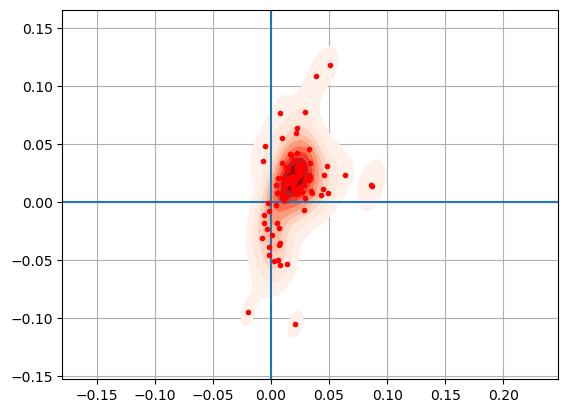

In [60]:
plt.plot(avexs,aveys,".",color="red",zorder=3)
sns.kdeplot(x=avexs, y=aveys, cmap="Reds", fill=True, thresh=0.05,zorder=2, edgecolor="black")
#plt.plot(maxxs,maxys,".",color="blue",zorder=3)
#sns.kdeplot(x=maxxs, y=maxys, cmap="Blues", fill=True, thresh=0.05,alpha=0.8,zorder=2)
#sns.kdeplot(x=maxxs, y=maxys, color="black", fill=False, thresh=0.1,alpha=0.8,zorder=3, lw=0.5)


plt.axis("equal")
plt.grid()
plt.axvline(0)
plt.axhline(0)

/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


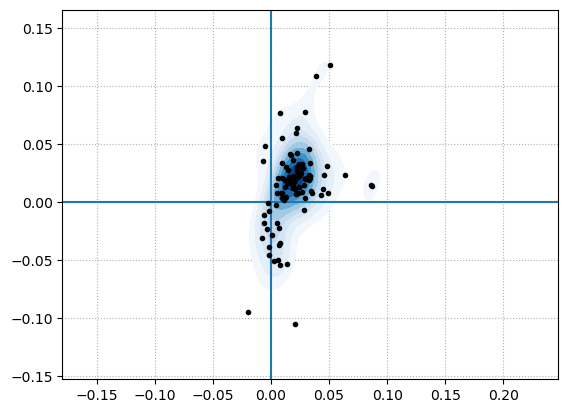

In [61]:
plt.plot(avexs,aveys,".",color="black",zorder=3)
sns.kdeplot(x=avexs, y=aveys, cmap="Blues", fill=True, thresh=0.1,zorder=2)
plt.axis("equal")
plt.grid(linestyle=":",zorder=-1)
plt.axvline(0)
plt.axhline(0)

In [125]:
#variability keeps you away from narrow peaks . highest fitness peaks are narrow. variability does not necc help. 
# but it consistently find wider, which is somethies higher
# highest fit peak narrow. however there are wide basins that are higher than others and wihtou variability you are less likely to find them.
# without variability you get stuck in local optima. with variability you are pushed out of local optima. 
# with var can't get stuck in narrow local optime, but can get stuck in wide local optima. which can be worse or better (higher/lower than static) depending.

# In our environment the fitness has a max (1 when the patter is perfectly matched)
# Peaks near the max are narrow so robustness is not going to help you get there (see plot with max at the origin)
# However, during evolution, when you are not yet close to the max, mechanisms that promote robustness (here variability)
# can help you find better local optima (see plot with the avg leaning towards top-right)
# As such, the conundrum of "Can you have both evolvability and robustness" depends on the shape of landscape.
# i.e. There can be stages where you have your cake and eat it too.

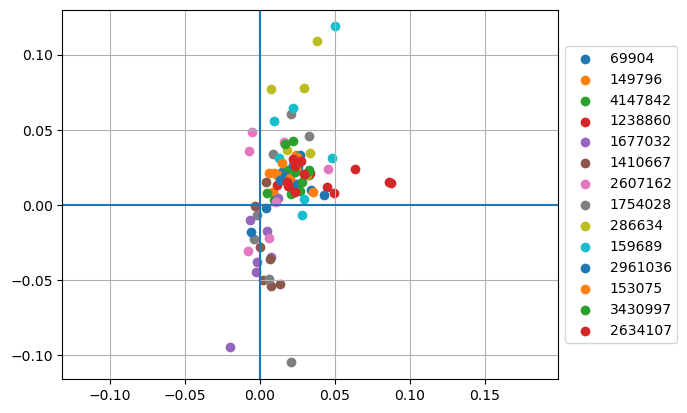

In [63]:
n=len(rules)
groups_xs = []
groups_ys = []
for i in range(len(seed_intss)):
    plt.scatter(avexs[n*i:n*(i+1)],aveys[n*i:n*(i+1)],label=seed_intss[i])
    groups_xs.append(avexs[n*i:n*(i+1)])
    groups_ys.append(aveys[n*i:n*(i+1)])
    #for j, label in enumerate(rules):
        #plt.text(xs[n*i:n*(i+1)][j], ys[n*i:n*(i+1)][j], label, fontsize=12)
#plt.scatter(xs[:len(rules)],ys[:len(rules)],c="red")
#plt.scatter(xs[len(rules):],ys[len(rules):],c="blue")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis("equal")
plt.grid()
plt.axvline(0)
plt.axhline(0)

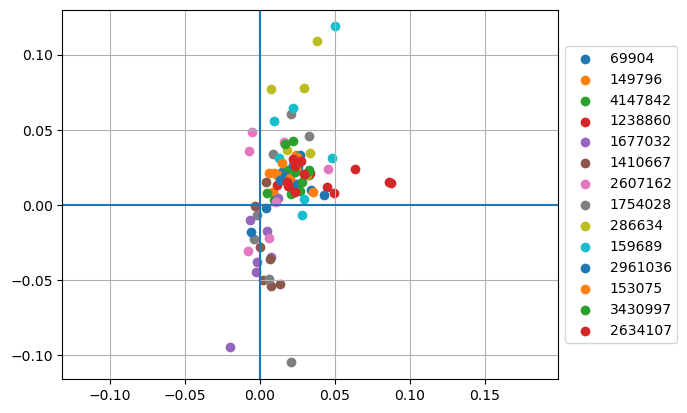

In [64]:
n=len(rules)
groups_xs = []
groups_ys = []
for i in range(len(seed_intss)):
    plt.scatter(avexs[n*i:n*(i+1)],aveys[n*i:n*(i+1)],label=seed_intss[i])
    groups_xs.append(avexs[n*i:n*(i+1)])
    groups_ys.append(aveys[n*i:n*(i+1)])
    #for j, label in enumerate(rules):
        #plt.text(xs[n*i:n*(i+1)][j], ys[n*i:n*(i+1)][j], label, fontsize=12)
#plt.scatter(xs[:len(rules)],ys[:len(rules)],c="red")
#plt.scatter(xs[len(rules):],ys[len(rules):],c="blue")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis("equal")
plt.grid()
plt.axvline(0)
plt.axhline(0)

In [65]:
a=(np.array(groups_xs) + np.array(groups_ys))/2
a.shape

(14, 7)

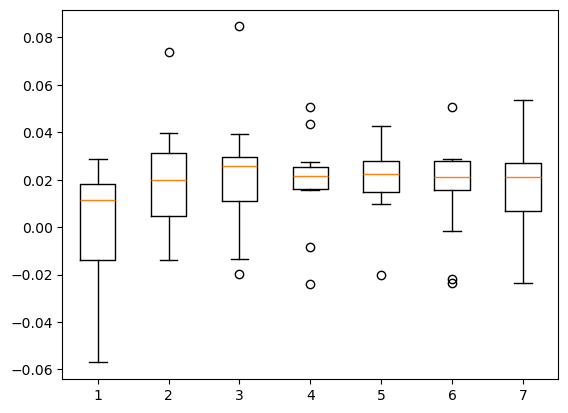

In [66]:
all_group = (np.array(groups_xs) + groups_ys)/2
plt.boxplot(all_group)
plt.show()

In [67]:
stat, p = kruskal(*all_group)
p

6.854589792506422e-07

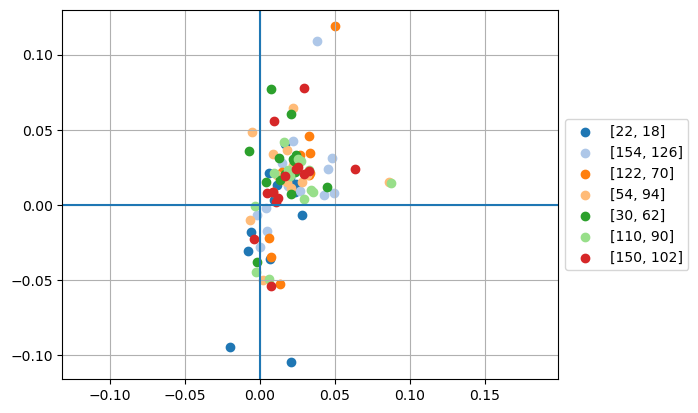

In [68]:
colors = sns.color_palette("tab20", len(rules))
n=len(rules)
groups_xs = []
groups_ys = []
for i in range(n):
    #plt.scatter(maxxs[n*i:n*(i+1)],maxys[n*i:n*(i+1)],label=seed_intss[i])
    plt.scatter(avexs[i::n],aveys[i::n],label=rules[i],color=colors[i])
    groups_xs.append(avexs[i::n])
    groups_ys.append(aveys[i::n])
    #for j, label in enumerate(rules):
        #plt.text(xs[n*i:n*(i+1)][j], ys[n*i:n*(i+1)][j], label, fontsize=12)
#plt.scatter(xs[:len(rules)],ys[:len(rules)],c="red")
#plt.scatter(xs[len(rules):],ys[len(rules):],c="blue")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis("equal")
plt.grid()
plt.axvline(0)
plt.axhline(0)

In [18]:
root0="~/scratch/non_detailed_save/diff_rules/"
root1="~/CA_GRN_results/non_detailed_save/extra_inputs/"
root2="~/CA_GRN_results/non_detailed_save/"
root3="~/CA_GRN_results/detailed_save/"

season_len = 300
#seed_intss = [[69904,149796],[4147842,1238860],[1677032,1410667],[2607162,1754028],[286634,159689],[2961036,153075],[3430997,2634107]]
seed_intss=[69904,149796,4147842,1238860,1677032,1410667,2607162,1754028,286634,159689,2961036,153075,3430997,2634107]
metric = "maxfits"
num_cells = 22
dev_steps = 22
grn_size = 22
geneid = 1
num_reps = 15

maxxs = []
maxys = []
#rules = [22, 126, 154, 18, 122, 70,54,94,30,50,62,110,90,150,102]
rules=[[22,18],[154,126],[122,70],[54,94],[30,62],[110,90],[150,102]]

ones_1=[]
ones_2=[]
perc_overlaps=[]
stat_end_1 = []
stat_end_2 = []

pop = np.random.randn(1000, grn_size+2, grn_size).astype(np.float64)

data = []
max_pss=[]
max_rand = []
for rule in rules:
    for idx, seed_int in enumerate(seed_intss):

        #Info about target
        start_patternA = helper.seedID2string(seed_int, num_cells)
        #start_patternB = helper.seedID2string(seed_ints[1], num_cells)
        targetA = helper.rule2targets_wrapped_wstart(rule[0], L=dev_steps+1, N=num_cells, start_pattern=start_patternA)
        targetB = helper.rule2targets_wrapped_wstart(rule[1], L=dev_steps+1, N=num_cells, start_pattern=start_patternA)

        #Random success
        _,_, rand_fitnesses1 = helper.get_pop_TPF(pop, 1000, num_cells, grn_size, dev_steps, geneid, rule[0], seed_int,seed_int)
        _,_, rand_fitnesses2 = helper.get_pop_TPF(pop, 1000, num_cells, grn_size, dev_steps, geneid, rule[1], seed_int,seed_int)

        #ave_rand.append((sum(rand_fitnesses1)/len(rand_fitnesses1) + sum(rand_fitnesses2)/len(rand_fitnesses2))/2)
        max_rand.append((max(rand_fitnesses1) + max(rand_fitnesses2))/2)


        ones_1.append(sum(targetA).sum()/(num_cells*(dev_steps+1)))
        ones_2.append(sum(targetB).sum()/(num_cells*(dev_steps+1)))
        where_overlap = np.where(targetA==targetB)
        perc_overlaps.append(len(targetA[where_overlap])/(22*23))

        if idx < 2:
            root=root3
        elif idx == 2 or idx == 3:
            root=root2
        else:
            root=root1
        
        vari_maxs, env1_maxs, env2_maxs=helper.get_fits_dr(rule, seed_int, metric, root0, root, season_len, num_reps, id_start = 0)
        vari_maxs=[v[:9600] for v in vari_maxs]
        env1_maxs=[v[:9600] for v in env1_maxs]
        env2_maxs=[v[:9600] for v in env2_maxs]
        if metric == "geno_stds":
            vari_maxs=[v[9000:] for v in vari_maxs]
            env1_maxs=[v[9000:] for v in env1_maxs]
            env2_maxs=[v[9000:] for v in env2_maxs]
        
        stat_end_1.append(np.array(env1_maxs)[:,-1].mean())
        stat_end_2.append(np.array(env2_maxs)[:,-1].mean())
    
        d,c,ps,lists = helper.scatter_value(vari_maxs, env1_maxs, env2_maxs, season_len=300)
        for i in range(num_reps): #list1, list2, static1, static2
            data.append({'CA': str(rule), 'Seed': str(seed_int), 'Env': "vari1", 'Val': lists[0][i]})
            data.append({'CA': str(rule), 'Seed': str(seed_int), 'Env': "vari2", 'Val': lists[1][i]})
            data.append({'CA': str(rule), 'Seed': str(seed_int), 'Env': "static1", 'Val': lists[2][i]})
            data.append({'CA': str(rule), 'Seed': str(seed_int), 'Env': "static2", 'Val': lists[3][i]})

        max_pss.append(ps)
        maxxs.append(d[0])
        maxys.append(d[1])
df = pd.DataFrame(data)

Text(0, 0.5, 'Variable - static envrionment 2 fitnesses')

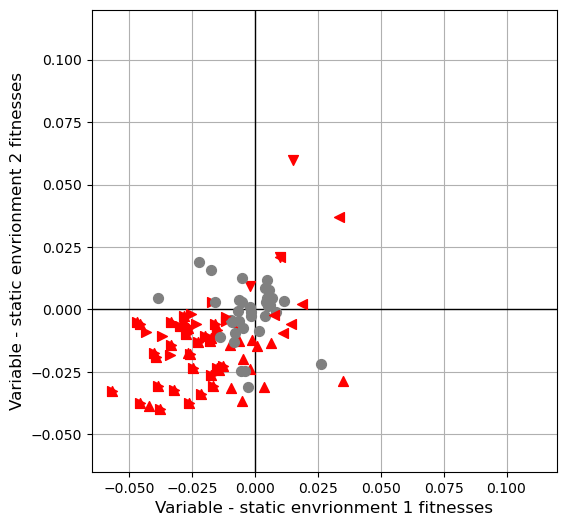

In [60]:
fig = plt.figure(figsize=(6,6))
plt.axvline(0,lw=1, color="black",zorder=1)
plt.axhline(0,lw=1, color="black",zorder=1)

mysize=50
myalpha=1
c=0
for i in range(len(seed_intss)):
        for rule in rules:
                if max_pss[c][0] >= 0.05 and max_pss[c][1] >= 0.05:
                        mycolor = "grey"
                        mymarker = "o"
                        plt.scatter(maxxs[c],maxys[c],marker=mymarker,color=mycolor,alpha=myalpha,s=mysize,zorder=2)
                else:
                        if max_pss[c][0] < 0.05:
                                if maxxs[c] > 0:
                                        plt.scatter(maxxs[c],maxys[c],marker="<",color="red",alpha=myalpha,s=mysize,zorder=2)
                                        #plt.text(maxxs[c],maxys[c],rule)
                                else:
                                        plt.scatter(maxxs[c],maxys[c],marker=">",color="red",alpha=myalpha,s=mysize,zorder=2)
                                        #plt.text(maxxs[c],maxys[c],rule)
                        if max_pss[c][1] < 0.05:
                                if maxys[c] > 0:
                                        plt.scatter(maxxs[c],maxys[c],marker="v",color="red",alpha=myalpha,s=mysize,zorder=2)
                                        #plt.text(maxxs[c],maxys[c],rule)
                                else:
                                        plt.scatter(maxxs[c],maxys[c],marker="^",color="red",alpha=myalpha,s=mysize,zorder=2)
                                        #plt.text(maxxs[c],maxys[c],rule)

                
                #plt.text(maxxs[c],maxys[c],rule)

                c+=1

plt.grid()
plt.gca().set_axisbelow(True)
#plt.axis("equal")
plt.ylim(-0.065, 0.12)
plt.xlim(-0.065, 0.12)
plt.xlabel("Variable - static envrionment 1 fitnesses",fontsize=12)
plt.ylabel("Variable - static envrionment 2 fitnesses",fontsize=12)

Text(0, 0.5, 'Variable - static envrionment 2 fitnesses')

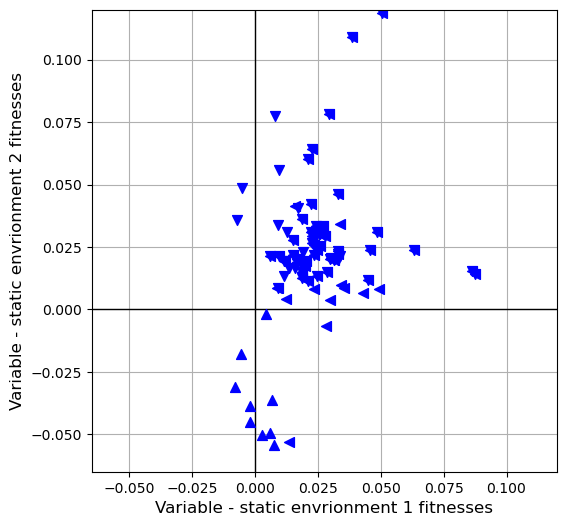

In [61]:
fig = plt.figure(figsize=(6,6))
plt.axvline(0,lw=1, color="black",zorder=1)
plt.axhline(0,lw=1, color="black",zorder=1)
mysize=50
myalpha=1
c=0
for i in range(len(seed_intss)):
        for rule in rules:
                if ave_pss[c][0] < 0.05:
                        if avexs[c] > 0:
                                plt.scatter(avexs[c],aveys[c],marker="<",color="blue",alpha=myalpha,s=mysize,zorder=2)
                                #plt.text(maxxs[c],maxys[c],rule)
                        else:
                                plt.scatter(avexs[c],aveys[c],marker=">",color="blue",alpha=myalpha,s=mysize,zorder=2)
                                #plt.text(maxxs[c],maxys[c],rule)
                if ave_pss[c][1] < 0.05:
                        if aveys[c] > 0:
                                plt.scatter(avexs[c],aveys[c],marker="v",color="blue",alpha=myalpha,s=mysize,zorder=2)
                                #plt.text(maxxs[c],maxys[c],rule)
                        else:
                                plt.scatter(avexs[c],aveys[c],marker="^",color="blue",alpha=myalpha,s=mysize,zorder=2)
                                #plt.text(maxxs[c],maxys[c],rule)

                c+=1

plt.grid()
plt.gca().set_axisbelow(True)
#plt.axis("equal")
plt.ylim(-0.065, 0.12)
plt.xlim(-0.065, 0.12)
plt.xlabel("Variable - static envrionment 1 fitnesses",fontsize=12)
plt.ylabel("Variable - static envrionment 2 fitnesses",fontsize=12)

/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as

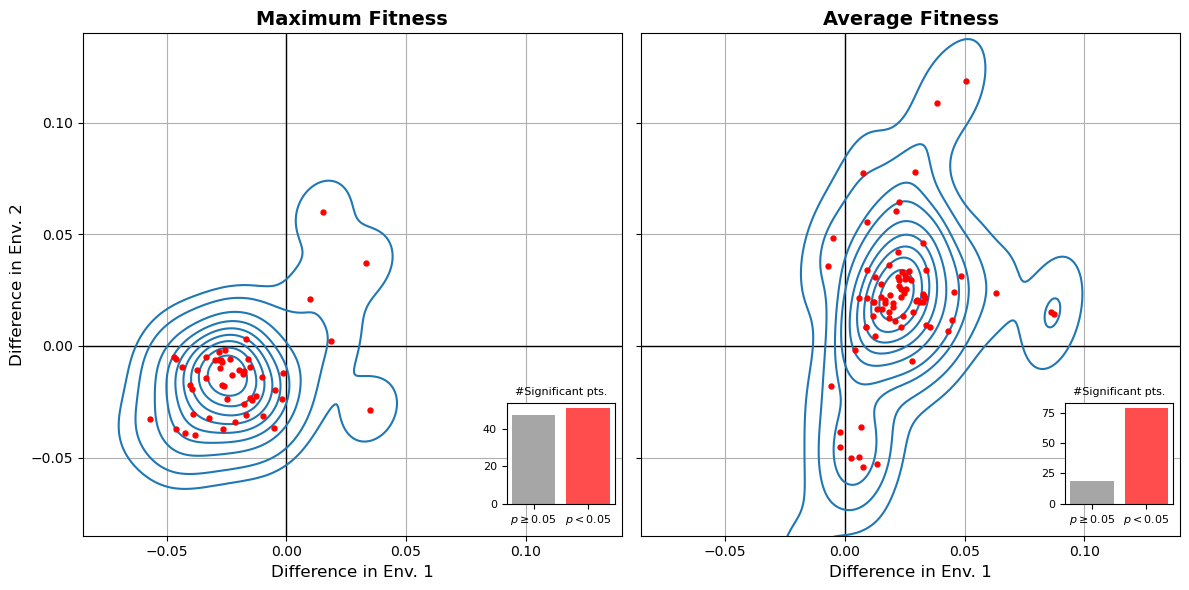

In [19]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

#plt.style.use('seaborn-v0_8-dark')

# Main figure and subplots
fig, [ax0, ax1] = plt.subplots(figsize=(12, 6), ncols=2, sharex=True, sharey=True)

# Add lines to subplots
for ax in [ax0, ax1]:
    ax.axvline(0, lw=1, color="black", zorder=1, alpha=1)
    ax.axhline(0, lw=1, color="black", zorder=1, alpha=1)

# Example unzip function
def unzip(l):
    return list(zip(*l))

alpha_sig = 0.05
max_adjusted_pvalues = multipletests(np.array(max_pss).flatten(), method='fdr_bh')[1]
max_adjusted_pvalues = max_adjusted_pvalues.reshape(98,2)
ave_adjusted_pvalues = multipletests(np.array(ave_pss).flatten(), method='fdr_bh')[1]
ave_adjusted_pvalues = ave_adjusted_pvalues.reshape(98,2)

kwargs = {"color":"red", "alpha":1, "s":50, "zorder":2}

max_sig_xs, max_sig_ys = unzip([(x,y) for (env1, env2),x,y in zip(max_adjusted_pvalues, maxxs, maxys) if env1 < alpha_sig or env2 < alpha_sig])
sns.kdeplot(x = max_sig_xs, y = max_sig_ys, ax=ax0,fill=False)
for (env1, env2),x,y in zip(max_adjusted_pvalues, maxxs, maxys):
        cwargs = dict(kwargs)
        if env1 < alpha_sig or env2 < alpha_sig:
                ax0.scatter(x,y,marker=".", **cwargs)

ave_sig_xs, ave_sig_ys = unzip([(x,y) for (env1, env2),x,y in zip(ave_adjusted_pvalues, avexs, aveys) if env1 < alpha_sig or env2 < alpha_sig])
sns.kdeplot(x = ave_sig_xs, y = ave_sig_ys, ax=ax1,fill=False)
for (env1, env2),x,y in zip(ave_adjusted_pvalues, avexs, aveys):
        cwargs = dict(kwargs)
        if env1 < alpha_sig or env2 < alpha_sig:
                ax1.scatter(x,y,marker=".", **cwargs)

# Set axis properties
for ax in [ax0, ax1]:
    ax.grid()
    ax.set_axisbelow(True)

# Add inset bar plots
nsig_max = len(max_sig_xs)
nsig_ave = len(ave_sig_xs)
tot = len(maxxs)
inset_data_max = [tot - nsig_max, nsig_max]  # Made-up data for max plot
inset_data_avg = [tot - nsig_ave, nsig_ave]  # Made-up data for average plot
categories = [f'$p \geq {alpha_sig}$', f'$p < {alpha_sig}$']
sig_colors = ["gray", "red"]

ax0.set_ylim(-0.085, 0.14)
ax0.set_xlim(-0.085, 0.14)
ax1.set_ylim(-0.085, 0.14)
ax1.set_xlim(-0.085, 0.14)

# Inset for ax0
inset_ax0 = inset_axes(ax0, 
                       width="100%", 
                       height="100%", 
                       loc='lower right', 
                       bbox_to_anchor=[0.8, 0.05, 0.2, 0.2], 
                       bbox_transform=ax0.transAxes)
inset_ax0.bar(categories, inset_data_max, color=sig_colors, alpha=0.7)
inset_ax0.set_title("#Significant pts.", fontsize=8)
inset_ax0.tick_params(axis='both', which='major', labelsize=8)

# Inset for ax1
#inset_ax1 = inset_axes(ax1, width="20%", height="20%", loc='upper left')
inset_ax1 = inset_axes(ax1, 
                       width="100%", 
                       height="100%", 
                       loc='lower right', 
                       bbox_to_anchor=[0.8, 0.05, 0.2, 0.2], 
                       bbox_transform=ax1.transAxes)
inset_ax1.bar(categories, inset_data_avg, color=sig_colors, alpha=0.7)
inset_ax1.set_title("#Significant pts.", fontsize=8)
inset_ax1.tick_params(axis='both', which='major', labelsize=8)

# Axis labels and titles
ax0.set_xlabel("Difference in Env. 1", fontsize=12)
ax0.set_ylabel("Difference in Env. 2", fontsize=12)
ax1.set_xlabel("Difference in Env. 1", fontsize=12)
ax0.set_title("Maximum Fitness", weight="bold", fontsize=14)
ax1.set_title("Average Fitness", weight="bold", fontsize=14)

# Adjust layout and show plot
plt.subplots_adjust(wspace=0.05, hspace=0.3)
plt.tight_layout()
plt.show()
plt.style.use('default')


In [27]:
min(maxys)

-0.13056214349149353

/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as

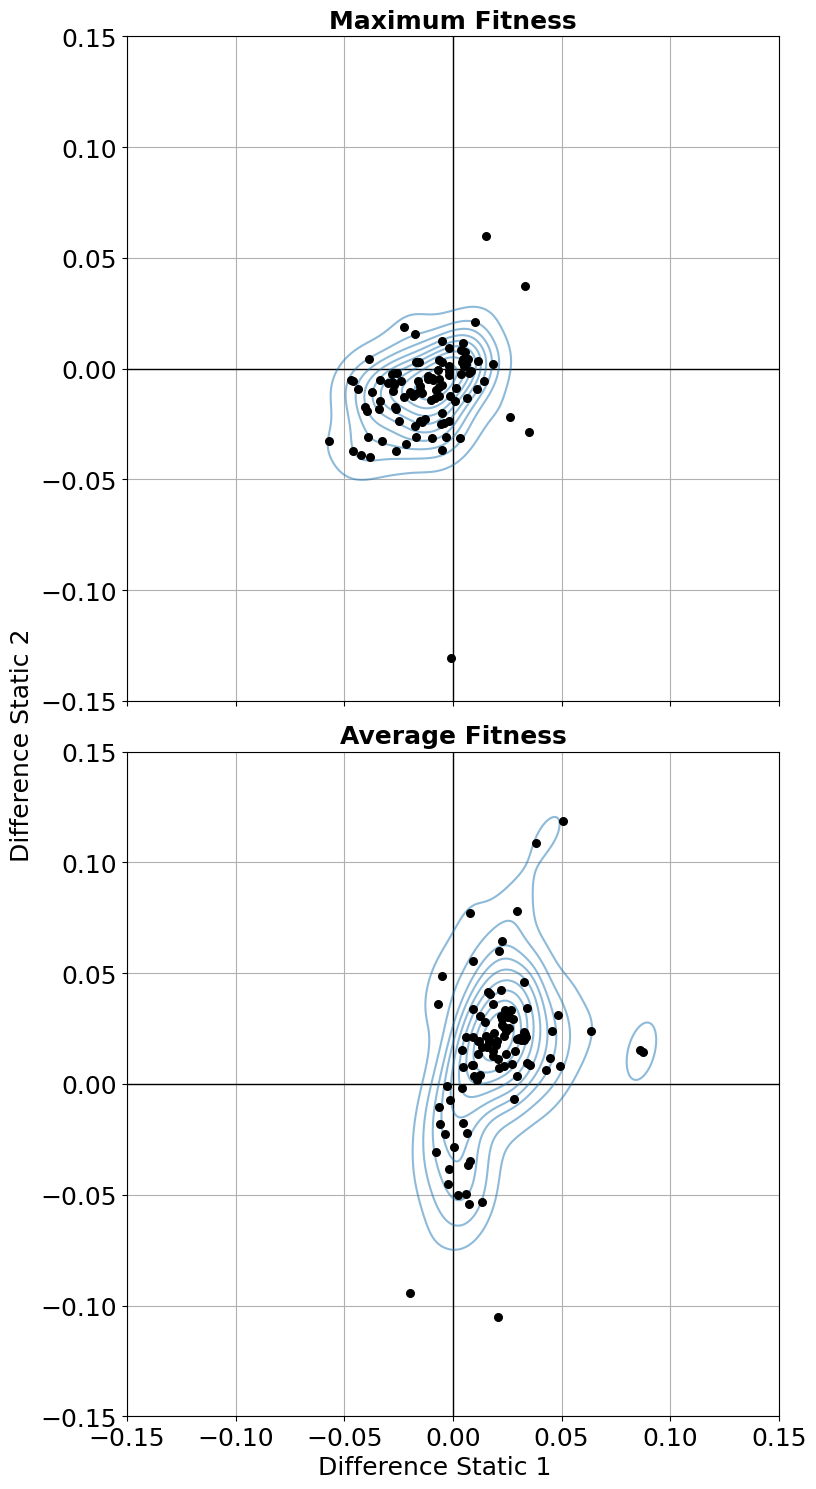

In [38]:
nrows,ncols = 2,1
scale = 7.5
#fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*scale, nrows*scale), sharex=True, sharey=True)

# Main figure and subplots
fig, [ax0, ax1] = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*scale, nrows*scale), sharex=True, sharey=True)

# Add lines to subplots
for ax in [ax0, ax1]:
    ax.axvline(0, lw=1, color="black", zorder=1, alpha=1)
    ax.axhline(0, lw=1, color="black", zorder=1, alpha=1)

sns.kdeplot(x = maxxs, y = maxys, ax=ax0,fill=False,thresh=0.1,zorder=1,alpha=0.5)
ax0.scatter(maxxs,maxys,marker="o", color="black", s=30)
#ax0.scatter(maxxs[:num_reps],maxys[:num_reps],marker="o", color="orange",edgecolors='black', s=30)

sns.kdeplot(x = avexs, y = aveys, ax=ax1,fill=False,thresh=0.1,zorder=1,alpha=0.5)
ax1.scatter(avexs,aveys,marker="o", color="black", s=30)
#ax1.scatter(avexs[:num_reps],aveys[:num_reps],marker="o", color="orange",edgecolors='black', s=30)

# Axis labels and titles
fig.supxlabel('Difference Static 1', fontsize = 18)
#fig.supylabel('Difference Static 2', fontsize = 18)
fig.text(
    -0.05,       # x-position in figure coordinates (0=left, 1=right)
    0.5,        # y-position in figure coordinates (0=bottom, 1=top)
    'Difference Static 2',
    va='center',
    ha='center',
    rotation='vertical',
    fontsize=18
)



ax0.set_title("Maximum Fitness", weight="bold", fontsize=18)
ax1.set_title("Average Fitness", weight="bold", fontsize=18)

ax0.set_xlim(-0.15, 0.15)
ax1.set_ylim(-0.15, 0.15)

# Set axis properties
for ax in [ax0, ax1]:
    ax.grid()
    ax.set_axisbelow(True)

plt.tight_layout()
ax0.tick_params(axis='both', which='major', labelsize=18)
ax1.tick_params(axis='both', which='major', labelsize=18)
#plt.show()
plt.savefig('main_scatters_diff_rules.pdf', format='pdf',bbox_inches='tight')
plt.style.use('default')

In [123]:
print(np.array(ave_pss).shape)
adjusted_pvalues = multipletests(np.array(ave_pss).flatten(), method='holm')[1]
c=0
for a in adjusted_pvalues.reshape(105,2):
    if a[0] < 0.05 or a[1] < 0.05:
        c+=1

(105, 2)


In [124]:
c

72

In [201]:
matplotlib.__version__

'3.8.0'

In [165]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


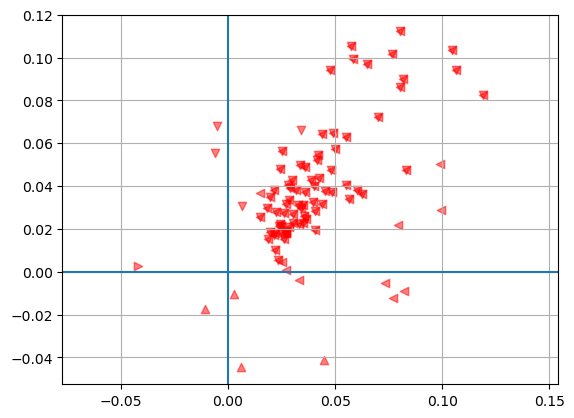

In [54]:
plt.axis("equal")
plt.grid()
plt.axvline(0)
plt.axhline(0)
c=0
for i in range(len(seed_intss)):
        for rule in rules:
                if ave_pss[c][0] < 0.05:
                        if avexs[c] > 0:
                                plt.scatter(avexs[c],aveys[c],marker="<",color="red",alpha=0.5)
                                #plt.text(avexs[c],aveys[c],rule)

                        else:
                                plt.scatter(avexs[c],aveys[c],marker=">",color="red",alpha=0.5)
                                #plt.text(avexs[c],aveys[c],rule)
                if ave_pss[c][1] < 0.05:
                        if aveys[c] > 0:
                                plt.scatter(avexs[c],aveys[c],marker="v",color="red",alpha=0.5)
                                #plt.text(avexs[c],aveys[c],rule)
                        else:
                                plt.scatter(avexs[c],aveys[c],marker="^",color="red",alpha=0.5)
                                #plt.text(avexs[c],aveys[c],rule)

                c+=1

In [65]:
root0

'~/scratch/non_detailed_save/diff_rules/'

[22, 18]


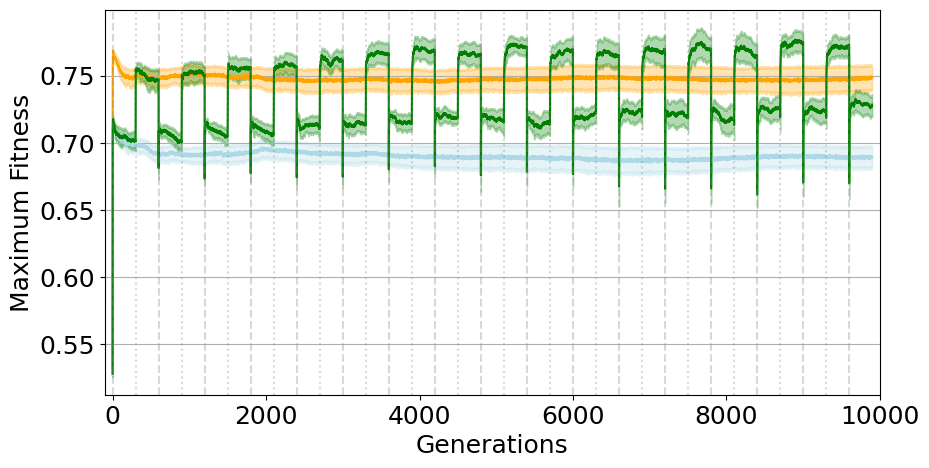

[154, 126]


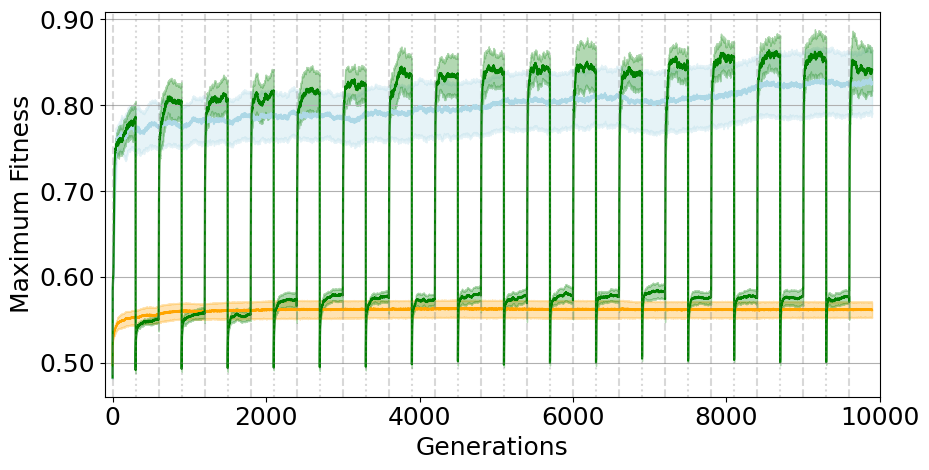

[122, 70]


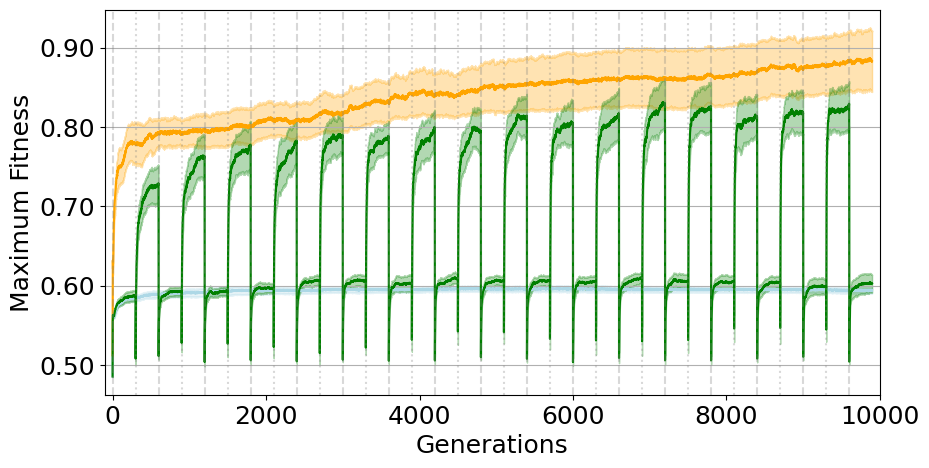

[54, 94]


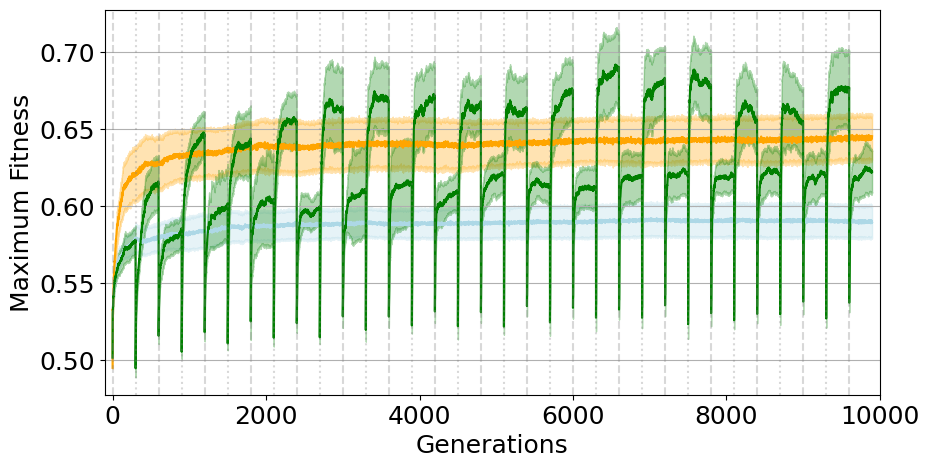

[30, 62]


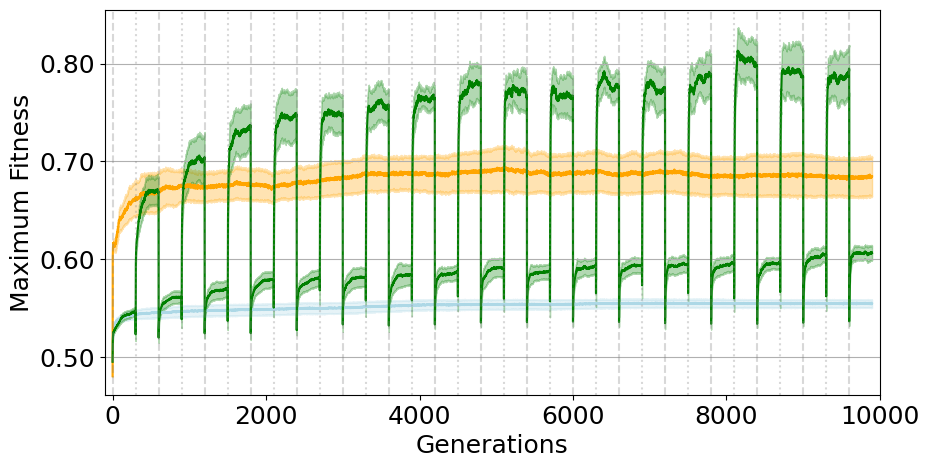

[110, 90]


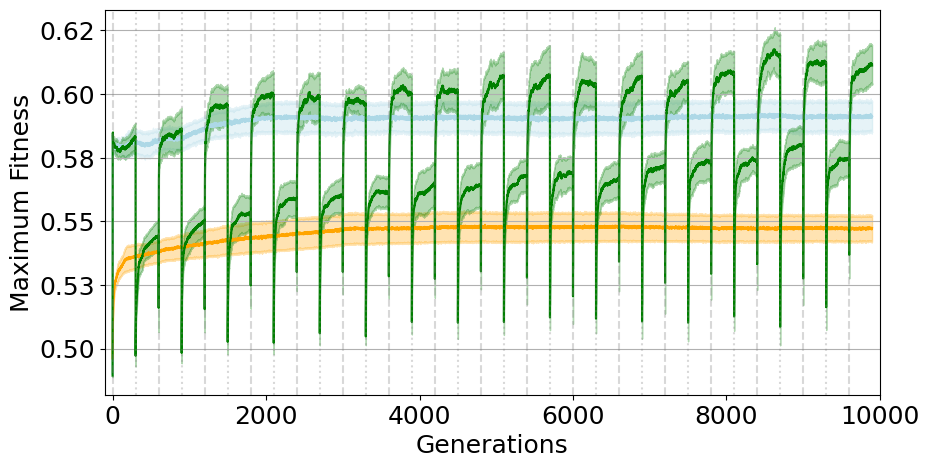

[150, 102]


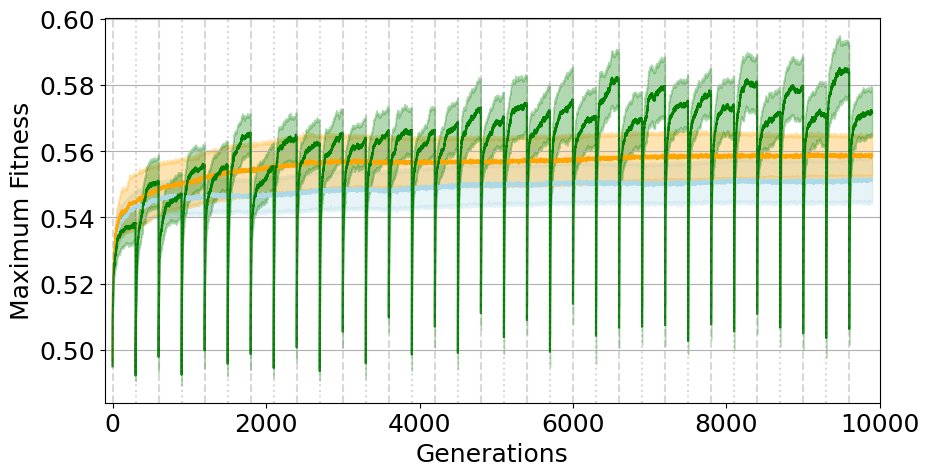

'\n# Check evol of evolvability\n# Fit drop\ns1_drops = mean1[300::300][::2]\ns2_drops = mean1[300::300][1::2]\n# Fit delta\ns1_x_gens_late_idx = np.arange(0,9899)[300::300][::2] + 10\ns2_x_gens_late_idx = np.arange(0,9899)[300::300][1::2] + 10\nfit_delta1 = mean1[s1_x_gens_late_idx] - s1_drops\nfit_delta2 = mean1[s2_x_gens_late_idx] - s2_drops\n\nplt.plot(s1_drops)\nplt.plot(s2_drops)\nplt.ylabel("fitness drop")\nplt.show()\n\nplt.plot(fit_delta1)\nplt.plot(fit_delta2)\nplt.ylabel("fitness increase in 10 gens")\nplt.show()\n'

In [68]:
#seed_intss = [[69904,149796],[4147842,1238860],[1677032,1410667],[2607162,1754028],[286634,159689],[2961036,153075],[3430997,2634107]]
seed_intss=[69904,149796,4147842,1238860,1677032,1410667,2607162,1754028,286634,159689,2961036,153075,3430997,2634107]
metric="avefits"
season_len = 300
num_reps=15
#root="~/CA_GRN_results/detailed_save/"#extra_inputs/"
#root="~/scratch/non_detailed_save/extra_inputs/"
id_start=0
seed_int_idx=9
seed_int = seed_intss[seed_int_idx]

#rules = [22, 126, 154, 18, 122, 70,54,94,30,50,62,110,90,150,102]
rules=[[22,18],[154,126],[122,70],[54,94],[30,62],[110,90],[150,102]]

#print(np.array(vari_maxs).shape)

#4/30, 0/126, 0/54

for rule in rules:
    fig, ax=plt.subplots(nrows=1,ncols=1, figsize=(10, 5),sharex=True) #sharey=True)
    for metric in ["avefits"]:
        if seed_int_idx < 2:
            root=root3
        elif seed_int_idx == 2 or seed_int_idx == 3:
            root=root2
        else:
            root=root1
        
        all_maxs=helper.get_fits_dr(rule, seed_int, metric, root0, root, season_len, num_reps, id_start = 0)

        #all_maxs=helper.get_fits_dr([rule,rule], seed_ints, metric, root, season_len, num_reps, id_start, extrapolate=True)
        all_maxs=np.array(all_maxs)
        labels=["Variable","Static 1","Static 2"]
        colors = ["green", "lightblue", "orange"]
        z_value = 1.96  # For a 95% confidence interval

        #plot all variable, together
        #fig, ax=plt.subplots(nrows=1,ncols=1, figsize=(10, 5),sharex=True) #sharey=True)
        for i,m in enumerate(all_maxs[1:]):
            mean1 = np.mean(m, axis=0)
            stderr1 = np.std(m, axis=0) / np.sqrt(num_reps)
            ci_upper = mean1 + z_value * stderr1
            ci_lower = mean1 - z_value * stderr1
            ax.fill_between(range(len(mean1)), ci_lower, ci_upper, alpha=0.3, color = colors[1:][i])
            ax.plot(mean1, "-", label=labels[1:][i], color = colors[1:][i])
        m=all_maxs[0]
        mean1 = np.mean(m, axis=0)
        stderr1 = np.std(m, axis=0) / np.sqrt(num_reps)
        ci_upper = mean1 + z_value * stderr1
        ci_lower = mean1 - z_value * stderr1
        ax.fill_between(range(len(mean1)), ci_lower, ci_upper, alpha=0.3,color=colors[0])
        ax.plot(mean1, "-", label= labels[0], color=colors[0])
        ax.set_xlim(-100,10_000)
        #ax.set_ylim(0,0.7)
        #ax.legend(prop={'size': 18})
        for j in range(0, len(mean1), season_len):
            if j % (season_len * 2) == 0:
                ax.axvline(j, linestyle="--", color="gray", alpha=0.3)
            else:
                ax.axvline(j, linestyle=":", color="gray", alpha=0.3)
        
        
        print(rule)

        plt.ylabel("Maximum Fitness", fontsize="18")
        plt.xlabel("Generations", fontsize="18")
        ax.tick_params(axis='both', which='major', labelsize=18)

        from matplotlib.ticker import FuncFormatter

        def format_yticks(tick, _):
            return f"{tick:.2f}"

        plt.gca().yaxis.set_major_formatter(FuncFormatter(format_yticks))
        
        plt.grid(axis='y')
    plt.show()

'''
# Check evol of evolvability
# Fit drop
s1_drops = mean1[300::300][::2]
s2_drops = mean1[300::300][1::2]
# Fit delta
s1_x_gens_late_idx = np.arange(0,9899)[300::300][::2] + 10
s2_x_gens_late_idx = np.arange(0,9899)[300::300][1::2] + 10
fit_delta1 = mean1[s1_x_gens_late_idx] - s1_drops
fit_delta2 = mean1[s2_x_gens_late_idx] - s2_drops

plt.plot(s1_drops)
plt.plot(s2_drops)
plt.ylabel("fitness drop")
plt.show()

plt.plot(fit_delta1)
plt.plot(fit_delta2)
plt.ylabel("fitness increase in 10 gens")
plt.show()
'''
    

In [2]:
import numpy as np

# Example list
original_list = list(range(1, 1001))  # Numbers from 1 to 1000

# Convert to NumPy array
array = np.array(original_list)

# Extract every 200th and 201st element using slicing
result = array[199::200]  # Every 200th element
result = np.concatenate([result, array[200::200]])  # Add every 201st element
result = np.sort(result)  # Optional: Sort them for ordered output

print(result)  # Output: [200 201 400 401 600 601 800 801 1000]


[ 200  201  400  401  600  601  800  801 1000]


In [7]:
#root="~/Documents/GitHub/CA_GRN2/results_new_rules/"
#root="~/Documents/GitHub/CA_GRN2/results_testing_saving/"
root="~/scratch/non_detailed_save/"
#root="~/scratch/old_save/"
season_len = 300
seed_ints = [69904,149796] #[4147842,1238860]###
metric = "maxfits"
num_reps = 3

# NOTE: CAN USE BELOW CODE WITH THE FOLLOWING: 
# avail_metrics = ["avefits","maxfits","beststd","spec_pheno_stds", "pheno_stds", "geno_stds"]
# beststd - how good it could get at biased phenotypic variation, max
# spec_pheno_stds - how good it could get at biased phenotypic variation, mean
# pheno_stds - pheno variation among kids of one parent

#NOTE: I HAVE DECIDED THAT IT IS WEIRD TO END WITH SEASON 1 and have that season be seen more than season 2. 
# So cutting off end to be 9600 ends with season 2, all 300 gens (double checked)

xs = []
ys = []
#rules=np.array([22, 126, 146, 154, 82, 86, 18, 118, 122, 70,54,94,30,50,62,110,90,150,102,254])
#rules=np.array([22, 126, 154, 18, 122, 70,54,94,30,50,62,110,90,150,102])
rules=np.arange(0,256)

#Excluded 82 == 154, 146 == 18, 86 == 30, 118 == 62, 254 conceptually == 50
print(len(rules))
stds_mask = []
for rule in rules:
    #print(rule)
    vari_maxs, env1_maxs, env2_maxs=helper.get_fits([rule,rule], seed_ints, metric, root, season_len, num_reps, id_start = 0)
    vari_maxs=[v[:9600] for v in vari_maxs]
    env1_maxs=[v[:9600] for v in env1_maxs]
    env2_maxs=[v[:9600] for v in env2_maxs]
    if metric == "geno_stds":
        vari_maxs=[v[9000:] for v in vari_maxs]
        env1_maxs=[v[9000:] for v in env1_maxs]
        env2_maxs=[v[9000:] for v in env2_maxs]
    d,c,p,lists = helper.scatter_value(vari_maxs, env1_maxs, env2_maxs, season_len=300)
    xs.append(d[0])
    ys.append(d[1])

256


/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [3]:
root="~/scratch/detailed_save/"
#root="~/scratch/old_save/"
season_len = 300
seed_ints = [69904,149796] #[4147842,1238860]###
metric = "spec_pheno_stds"
num_reps = 15
orirules=np.array([22, 126, 154, 18, 122, 70,54,94,30,50,62,110,90,150,102])

orixs=[]
oriys=[]
for rule in orirules:
    #print(rule)
    vari_maxs, env1_maxs, env2_maxs=helper.get_fits([rule,rule], seed_ints, metric, root, season_len, num_reps, id_start = 0)
    vari_maxs=[v[:9600] for v in vari_maxs]
    env1_maxs=[v[:9600] for v in env1_maxs]
    env2_maxs=[v[:9600] for v in env2_maxs]

    d,c,p,lists = helper.scatter_value(vari_maxs, env1_maxs, env2_maxs, season_len=300)
    if metric in ["pheno_stds"]: #for these, interested in average, not max
        florp = np.array(vari_maxs).mean(axis=0) # average runs
        all_gens = np.arange(0,np.array(vari_maxs).shape[1])
        n_seasons = int(np.floor(florp.shape[0]/season_len))
        chunked_seasons = np.array([florp[i*season_len:(i+1)*season_len] for i in range(n_seasons)])
        chunked_gens = np.array([all_gens[i*season_len:(i+1)*season_len] for i in range(n_seasons)])
        chunked_season1, chunked_season2 = chunked_seasons[0::2], chunked_seasons[1::2]
        chunked_season1_g, chunked_season2_g = chunked_gens[0::2].flatten(), chunked_gens[1::2].flatten()
        # Get mean for each repeat season:
        mean_chunked_season1, mean_chunked_season2 = chunked_season1.mean(axis=1).mean(),chunked_season2.mean(axis=1).mean()
        orixs.append(mean_chunked_season1 - np.array(env1_maxs).mean(axis=0).mean())
        oriys.append(mean_chunked_season2 - np.array(env2_maxs).mean(axis=0).mean())
    else:
        orixs.append(d[0])
        oriys.append(d[1])

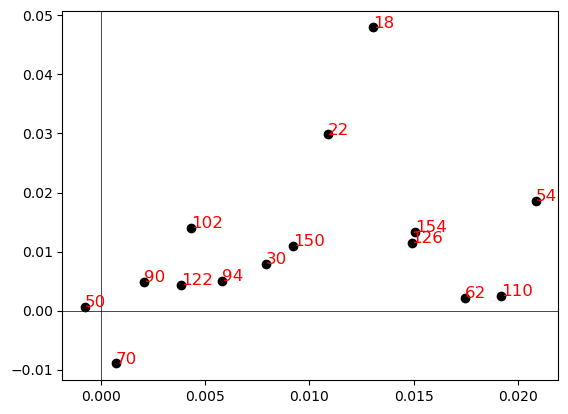

In [4]:
#usefulxs = []
#usefulys = []
#for i, rule in enumerate(rules):
    #if rule %2 == 0: #only check even rules, 000 -> 1
        #usefulxs.append(xs[i])
        #usefulys.append(ys[i])

#sns.kdeplot(x=usefulxs, y=usefulys, cmap="Blues", fill=True, thresh=0.1)

for i, label in enumerate(orirules):
    plt.text(orixs[i], oriys[i], label, fontsize=12, color = "red")

plt.scatter(orixs, oriys, color = "black")

plt.axvline(0, lw=0.5, color="black")
plt.axhline(0, lw=0.5, color="black")
#plt.xlim(-0.03,0.03)
#plt.ylim(-0.1,0.1)

In [7]:
print((np.array(orixs) + np.array(oriys))/2*100)

[ 2.03563924  1.31615748  1.42095016  3.05139826  0.40673556 -0.41168897
  1.97352336  0.54425275  0.78686528 -0.0061678   0.97922191  1.08153683
  0.34749978  1.00616436  0.91221907]


In [70]:
root="~/scratch/detailed_save/"
#root="~/scratch/old_save/"
season_len = 300
seed_ints = [69904,149796] #[4147842,1238860] ###
metric = "avefits"
num_reps = 15
orirules=np.array([22, 126, 154, 18, 122, 70,54,94,30,50,62,110,90,150,102])

newxs=[]
newys=[]
vari_ave=[]
for rule in orirules:
    #print(rule)
    vari_maxs, env1_maxs, env2_maxs=helper.get_fits([rule,rule], seed_ints, metric, root, season_len, num_reps, id_start = 0)
    vari_maxs=[v[:9600] for v in vari_maxs]
    env1_maxs=[v[:9600] for v in env1_maxs]
    env2_maxs=[v[:9600] for v in env2_maxs]
    if metric == "geno_stds":
        vari_maxs=[v[9000:] for v in vari_maxs]
        env1_maxs=[v[9000:] for v in env1_maxs]
        env2_maxs=[v[9000:] for v in env2_maxs]
    d,c,stds = helper.scatter_value(vari_maxs, env1_maxs, env2_maxs, season_len=300)
    newxs.append(c[0])
    newys.append(c[1])
    vari_ave.append((c[0]+c[1])/2)

seed_ints = [4147842,1238860] ###
root="~/scratch/non_detailed_save/"
for rule in orirules:
    #print(rule)
    vari_maxs, env1_maxs, env2_maxs=helper.get_fits([rule,rule], seed_ints, metric, root, season_len, num_reps, id_start = 0)
    vari_maxs=[v[:9600] for v in vari_maxs]
    env1_maxs=[v[:9600] for v in env1_maxs]
    env2_maxs=[v[:9600] for v in env2_maxs]
    if metric == "geno_stds":
        vari_maxs=[v[9000:] for v in vari_maxs]
        env1_maxs=[v[9000:] for v in env1_maxs]
        env2_maxs=[v[9000:] for v in env2_maxs]
    d,c,stds = helper.scatter_value(vari_maxs, env1_maxs, env2_maxs, season_len=300)
    newxs.append(c[0])
    newys.append(c[1])
    vari_ave.append((c[0]+c[1])/2)



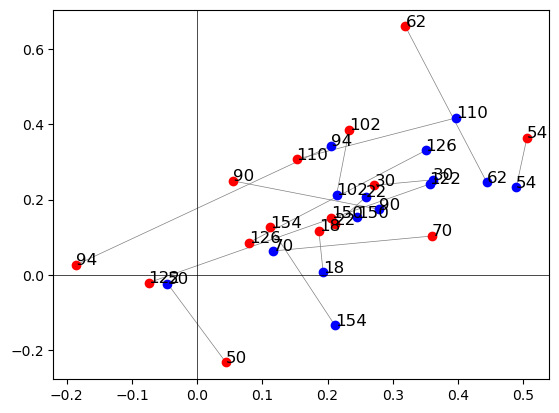

In [71]:
#plt.scatter(xs, ys, color="blue")
plt.scatter(newxs[:15], newys[:15], color="red")
plt.scatter(newxs[15:], newys[15:], color="blue")
for i, label in enumerate(orirules):
    plt.text(newxs[i], newys[i], label, fontsize=12, color = "black")
for i, label in enumerate(orirules):
    plt.text(newxs[i+15], newys[i+15], label, fontsize=12, color = "black")
for x0, x1, y0, y1 in zip(newxs[:15],newxs[15:], newys[:15], newys[15:]):
    plt.plot([x0,x1],[y0,y1],lw=0.5, color="gray",zorder=-1)
plt.axvline(0, lw=0.5, color="black")
plt.axhline(0, lw=0.5, color="black")

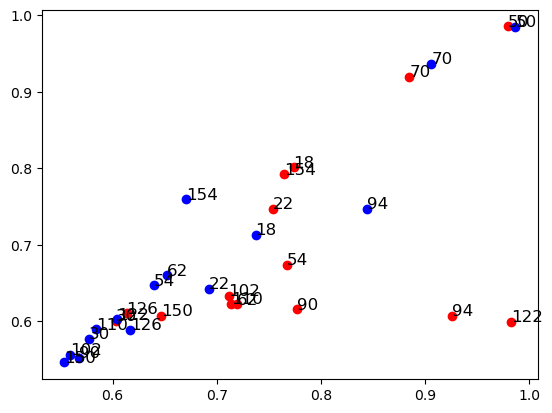

In [72]:
root="~/scratch/detailed_save/"
seed_ints = [69904,149796] #[4147842,1238860] ###
metric = "avefits"
id_start = 0

env1_end=[]
env2_end=[]
state_ave=[]
for rule in orirules:
    all_maxs=helper.get_fits([rule,rule], seed_ints, metric, root, season_len, num_reps, id_start, extrapolate=True)
    #vari_end = np.array(all_maxs[0])[:,-1].mean()
    env1_end.append(np.array(all_maxs[1])[:,-1].mean())
    env2_end.append(np.array(all_maxs[2])[:,-1].mean())
    state_ave.append((env1_end[-1]+env2_end[-1])/2)

root="~/scratch/non_detailed_save/"
seed_ints = [4147842,1238860] ###
for rule in orirules:
    all_maxs=helper.get_fits([rule,rule], seed_ints, metric, root, season_len, num_reps, id_start, extrapolate=True)
    #vari_end = np.array(all_maxs[0])[:,-1].mean()
    env1_end.append(np.array(all_maxs[1])[:,-1].mean())
    env2_end.append(np.array(all_maxs[2])[:,-1].mean())
    state_ave.append((env1_end[-1]+env2_end[-1])/2)

plt.scatter(env1_end[:15], env2_end[:15], color="red")
plt.scatter(env1_end[15:], env2_end[15:], color="blue")
for i, label in enumerate(orirules):
    plt.text(env1_end[i], env2_end[i], label, fontsize=12, color = "black")
for i, label in enumerate(orirules):
    plt.text(env1_end[i+15], env2_end[i+15], label, fontsize=12, color = "black")
    

0.3299984080945668


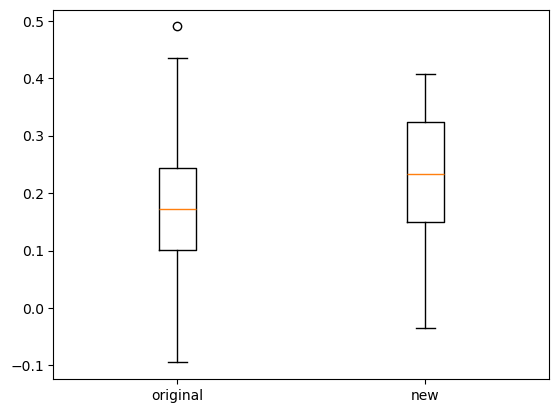

In [73]:
plt.boxplot([vari_ave[:15],vari_ave[15:]],labels=["original","new"])
t_stat, p_value = stats.ttest_ind(vari_ave[:15], vari_ave[15:])
print(p_value)

Text(0.69, 0.48, '$r$ = -0.57, $p$ = 0.000991488769543768')

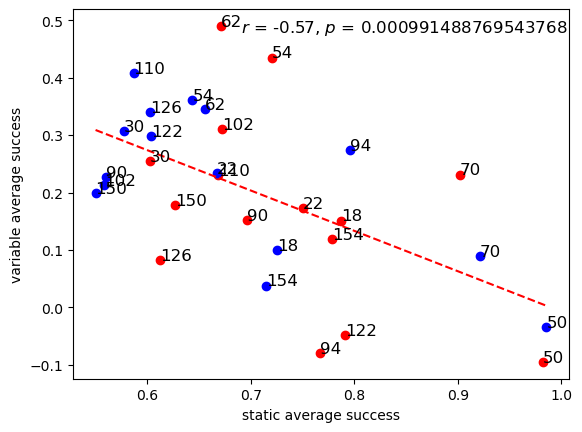

In [78]:
plt.scatter(state_ave[:15], vari_ave[:15], color="red")
plt.scatter(state_ave[15:], vari_ave[15:], color="blue")
for i, label in enumerate(orirules):
    plt.text(state_ave[i], vari_ave[i], label, fontsize=12, color = "black")
for i, label in enumerate(orirules):
    plt.text(state_ave[i+15], vari_ave[i+15], label, fontsize=12, color = "black")

x=state_ave
y=vari_ave
plt.xlabel("static average success")
plt.ylabel("variable average success")
slope, intercept, r_value, p_value, std_err = linregress(x, y)
x_fit = np.linspace(min(x), max(x), 100)
y_fit = slope * x_fit + intercept
plt.plot(x_fit, y_fit, color='red', linestyle='--', label=f'Fit: y = {slope:.2f}x + {intercept:.2f}')
plt.text(0.69, 0.48, f'$r$ = {r_value:.2f}, $p$ = {p_value}',fontsize=12)

In [4]:
#Plotting targets
nrows = len(rules)
ncols = 2
scale=2
dev_steps=22
num_cells=22

plotting = False

counter=0
rcounter=0
targets=[]
for i in range(nrows*2):
    if counter % 2 == 0:
        start_pattern = helper.seedID2string(seed_ints[0], num_cells)
        target = helper.rule2targets_wrapped_wstart(int(rules[rcounter]), L=dev_steps+1, N=num_cells, start_pattern=start_pattern)
        targets.append(target)
    else:
        start_pattern = helper.seedID2string(seed_ints[1], num_cells)
        target = helper.rule2targets_wrapped_wstart(int(rules[rcounter]), L=dev_steps+1, N=num_cells, start_pattern=start_pattern)
        rcounter+=1
        targets.append(target)
    counter+=1

#----------------
if plotting:
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * scale, nrows*scale), sharex=True, sharey=True)
    #ax.set_title(f"Rule: {rules[i]}", fontsize=16)

    axs = axs.flatten()
    counter=0
    rcounter=0
    targets=[]
    for i, ax in enumerate(axs):
        if counter % 2 == 0:
            start_pattern = helper.seedID2string(seed_ints[0], num_cells)
            target = helper.rule2targets_wrapped_wstart(int(rules[rcounter]), L=dev_steps+1, N=num_cells, start_pattern=start_pattern)
            #print("one",rules[rcounter])
            ax.set_ylabel(rules[rcounter], rotation=90, size='large')
            targets.append(target)
        else:
            start_pattern = helper.seedID2string(seed_ints[1], num_cells)
            target = helper.rule2targets_wrapped_wstart(int(rules[rcounter]), L=dev_steps+1, N=num_cells, start_pattern=start_pattern)
            #print("two",rules[rcounter])
            rcounter+=1
            targets.append(target)
        helper.imshow_ca(target,ax=ax)
        counter+=1

    for ax, col in zip(axs, ["T1","T2"]):
        ax.set_title(col)

    plt.tight_layout()
    plt.show()

/tmp/ipykernel_1599/2939256344.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_1599/2939256344.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


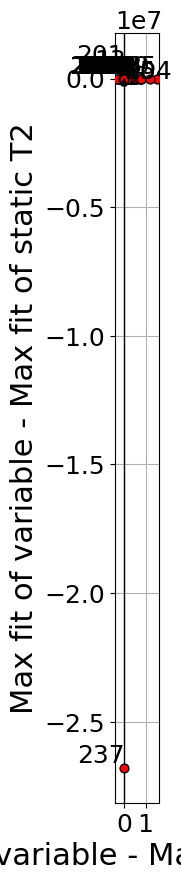

In [6]:
Ts = [
    targets[0::2],
    targets[1::2],
]

#xs,ys=pickle.load(open("2env_scatter.p", "rb"))

#rules_ims=[102,54,62,50,254,30,90,150,94,110]
#rules_scatter=[54,94,30,50,62,110,90,150,102,254]

plt.rcParams["font.size"] = 18

fig = plt.figure(constrained_layout=True, figsize=(18,10))
gs = fig.add_gridspec(len(rules), len(rules), wspace=0.0, hspace=0.2)
ax = fig.add_subplot(gs[:, :8])

helper.main_plt(xs, ys, rules, ax)

for T in [0, 1]:
    for i in range(len(rules)):
        ax = fig.add_subplot(gs[i, 8 + T])
        if i == 0 and T == 0:
            ax.set_title(f"T{T+1}", ha="center")
        if i == 0 and T == 1:
            ax.set_title(f"          T{T+1}   Rule", ha="center")
        if T == 1:
            ax.yaxis.set_label_position("right")
            ax.set_ylabel(f" {rules[i]}", rotation="horizontal", ha="left")
        helper.imshow_ca(Ts[T][i], ax=ax)

plt.tight_layout()
plt.show()
#plt.savefig("figs/2envinp_scatter.png")

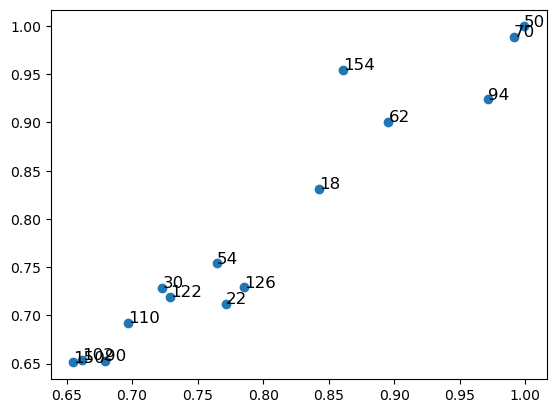

In [38]:
metric = "maxfits"
id_start = 0
env1_end=[]
env2_end=[]
for rule in rules:
    all_maxs=helper.get_fits([rule,rule], seed_ints, metric, root, season_len, num_reps, id_start, extrapolate=True)
    #vari_end = np.array(all_maxs[0])[:,-1].mean()
    env1_end.append(np.array(all_maxs[1])[:,-1].mean())
    env2_end.append(np.array(all_maxs[2])[:,-1].mean())

plt.scatter(env1_end, env2_end)
for i, label in enumerate(rules):
    plt.text(env1_end[i], env2_end[i], label, fontsize=12)
#plt.xlim(0.7,1)
#plt.ylim(0.7,1)


In [ ]:
root="~/scratch/non_detailed_save/"
#root="~/scratch/old_save/"
season_len = 300
seed_ints = [4147842,1238860]
num_reps=5
metric = "maxfits"
id_start = 0
env1_end=[]
env2_end=[]
for rule in rules:
    all_maxs=helper.get_fits([rule,rule], seed_ints, metric, root, season_len, num_reps, id_start, extrapolate=True)
    #vari_end = np.array(all_maxs[0])[:,-1].mean()
    env1_end.append(np.array(all_maxs[1])[:,-1].mean())
    env2_end.append(np.array(all_maxs[2])[:,-1].mean())

plt.scatter(env1_end, env2_end)
for i, label in enumerate(rules):
    plt.text(env1_end[i], env2_end[i], label, fontsize=12)

root="~/scratch/detailed_save/"
#root="~/scratch/old_save/"
season_len = 300
seed_ints = [69904,149796]
num_reps=15
metric = "maxfits"
id_start = 0
env1_end2=[]
env2_end2=[]
for rule in rules:
    all_maxs=helper.get_fits([rule,rule], seed_ints, metric, root, season_len, num_reps, id_start, extrapolate=True)
    #vari_end = np.array(all_maxs[0])[:,-1].mean()
    env1_end.append(np.array(all_maxs[1])[:,-1].mean())
    env2_end.append(np.array(all_maxs[2])[:,-1].mean())

plt.scatter(env1_end, env2_end)
for i, label in enumerate(rules):
    plt.text(env1_end[i], env2_end[i], label, fontsize=12)

In [33]:
rules

array([ 22, 126, 154,  18, 122,  70,  54,  94,  30,  50,  62, 110,  90,
       150, 102])

In [34]:
rules2 = [22, 126, 154, 18, 122, 70,54,94,30,50,62,110,90,150,102]
rules == rules2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

110
[8694 5392 8099 9816 2669 7328 1394 9898 9894 2100 2917 8837 7791 5392
 5695]
0


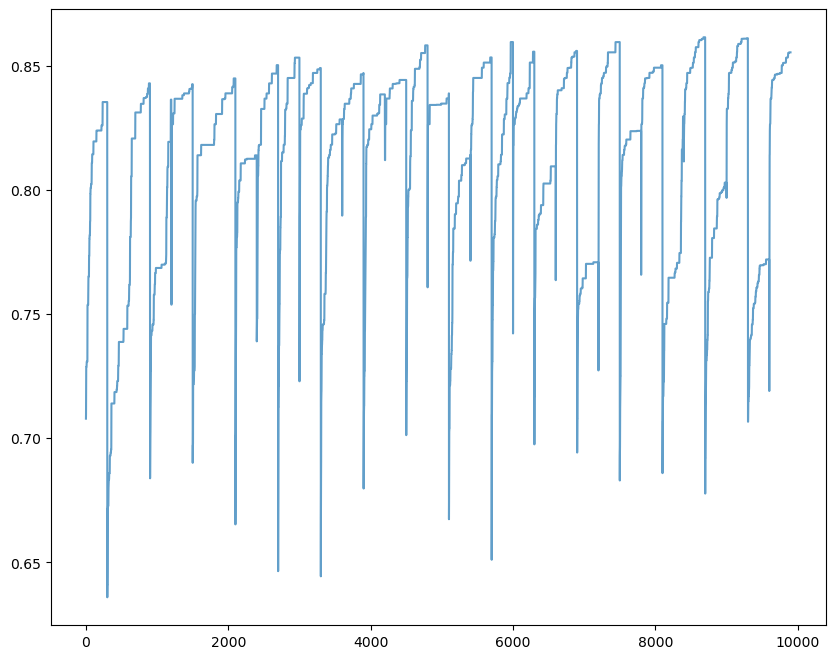

1


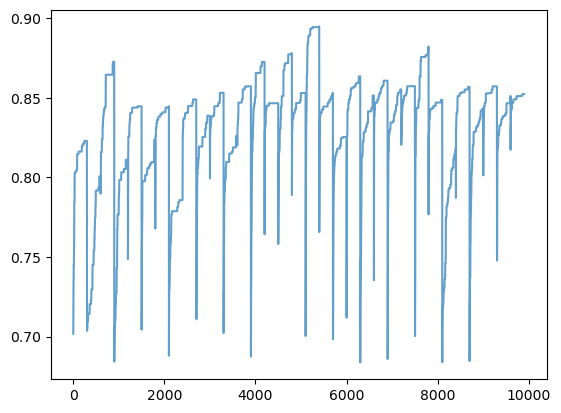

2


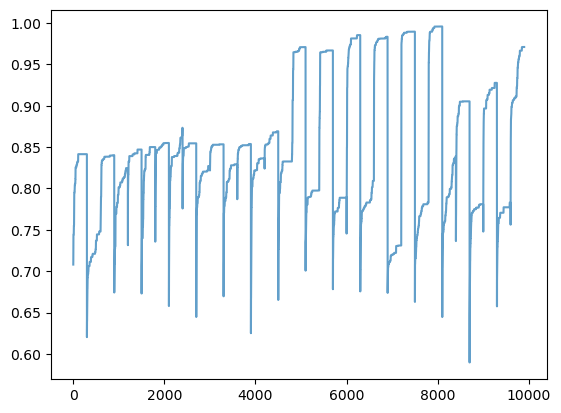

3


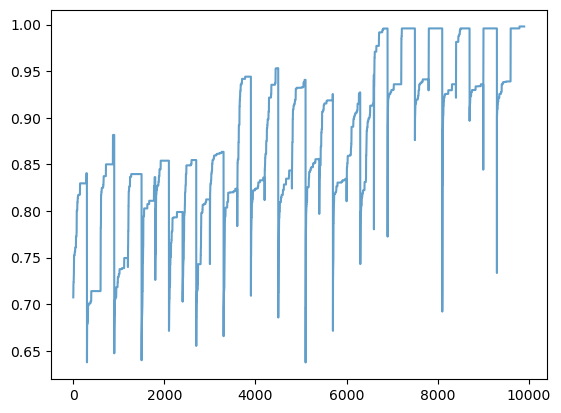

4


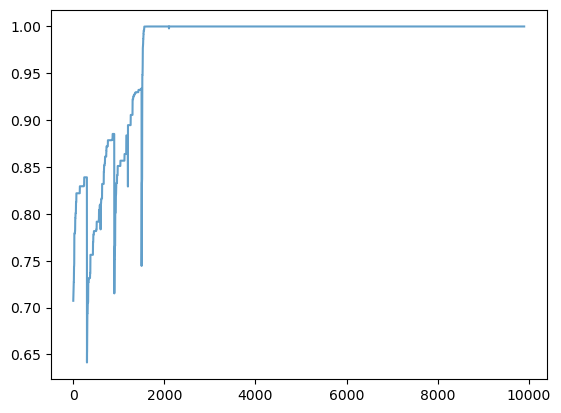

5


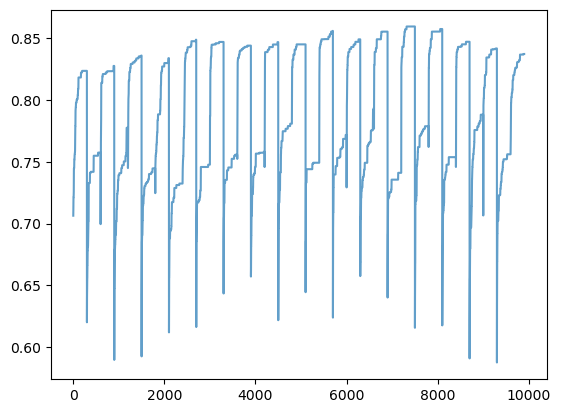

6


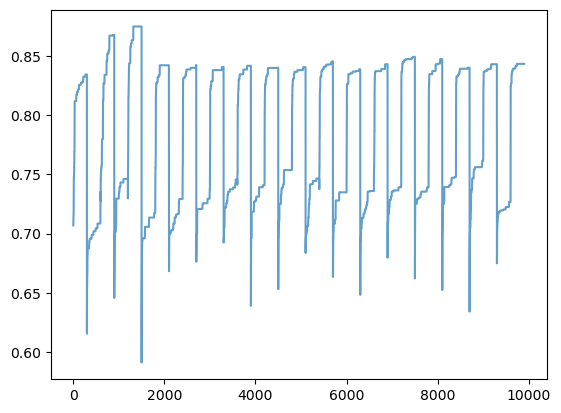

7


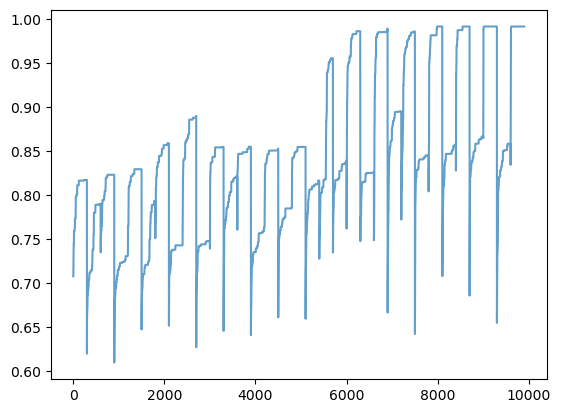

8


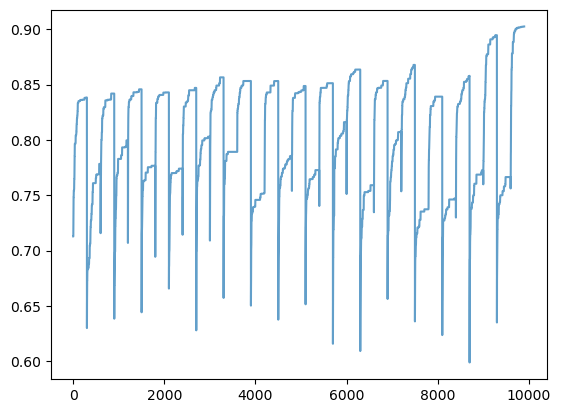

9


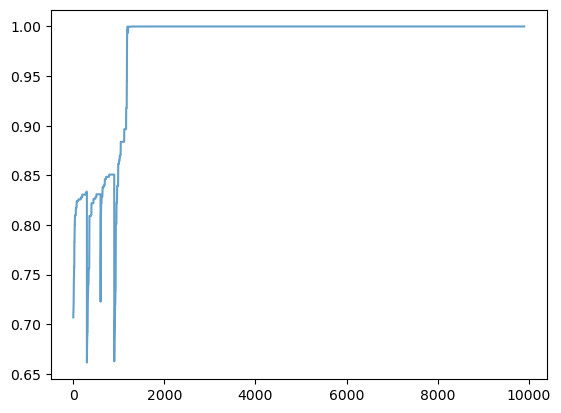

10


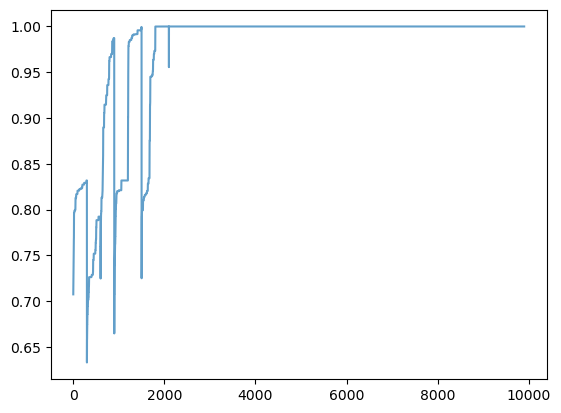

11


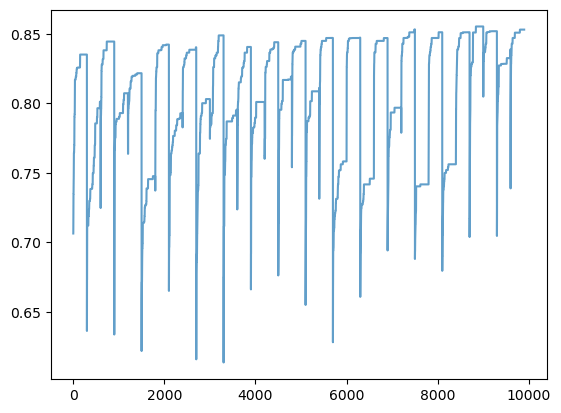

12


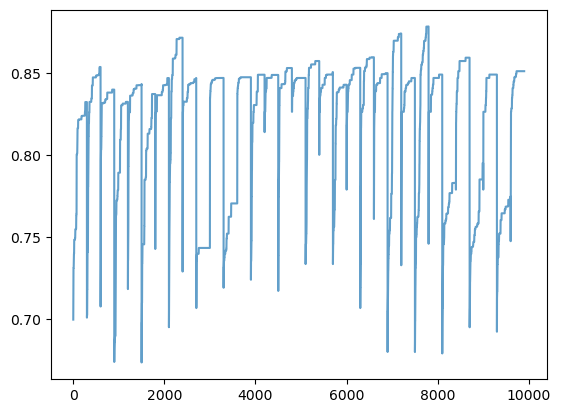

13


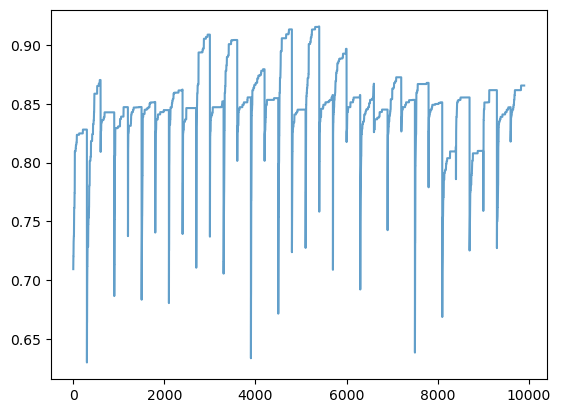

14


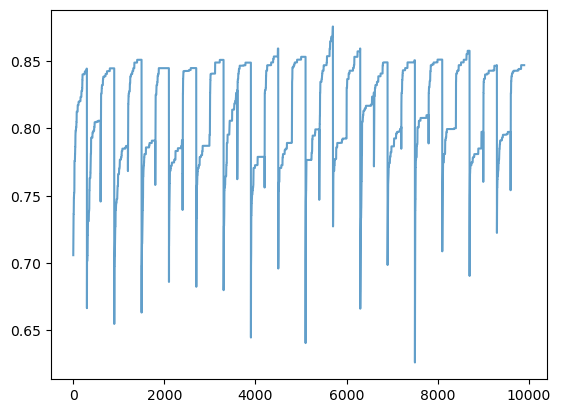

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


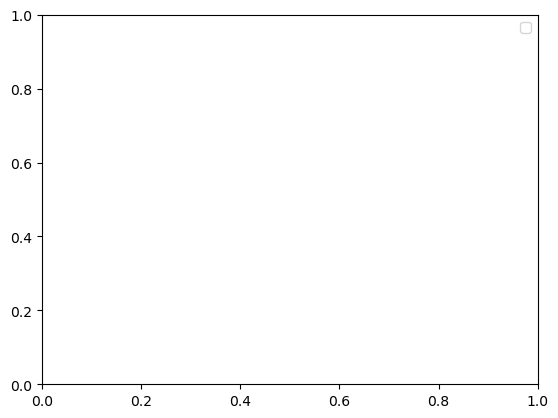

In [19]:
#102: no success env 2, 1 success env 1, 3 full success vari, another 4 close

root="~/scratch/non_detailed_save/alternative_input"
temprules = [70]
#metric = "spec_pheno_stds"
#metric = "pheno_stds"
metric = "maxfits"
num_reps = 15
season_len=300
id_start = 0
seed_ints = [69904,149796]
#149796

rules = [22, 126, 154, 18, 122, 70,54,94,30,50,62,110,90,150,102]
rules = [110]

maxs=[]
fig = plt.figure(figsize=(10,8))
for rule in rules:
    print(rule)
    vari_maxs=[np.loadtxt(os.path.expanduser(root+f"/stats_{season_len}_{rule}-{rule}_69904-149796_{i+1+id_start}_{metric}.txt")) for i in range(num_reps)]
    #vari_maxs=[np.loadtxt(os.path.expanduser(root+f"static/stats_{season_len}_{rule}_{149796}_{i+1+id_start}_{metric}.txt")) for i in range(num_reps)]
    vari_maxs=[v[:9899] for v in vari_maxs]
    print(np.argmax(vari_maxs, axis = 1))
    for i, v in enumerate(vari_maxs):
        print(i)
        plt.plot(v,label=i, alpha = 0.7)
        plt.show()
    #print(np.array(vari_maxs).shape)
    #plt.plot(np.array(vari_maxs).mean(axis=0),label=i, alpha = 0.7)
    #maxs.append(np.array(vari_maxs).mean(axis=0)[-1])
    plt.legend()
    #plt.xlim(0,300)
    plt.show()

In [28]:
metric, rule

('maxfits', 94)

(15, 9899)


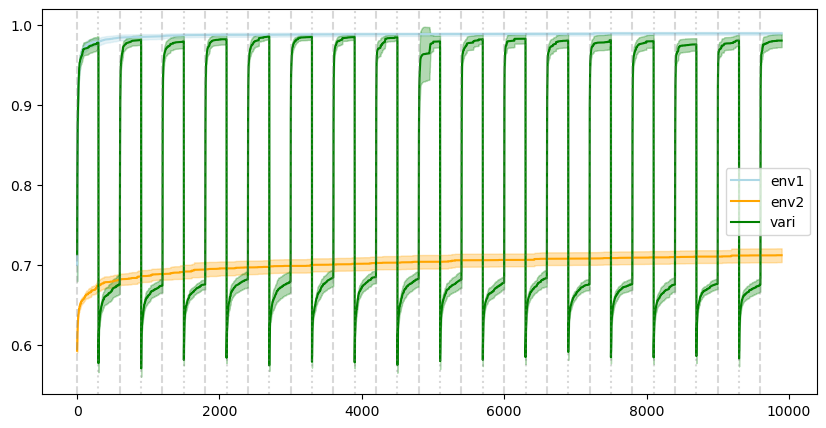

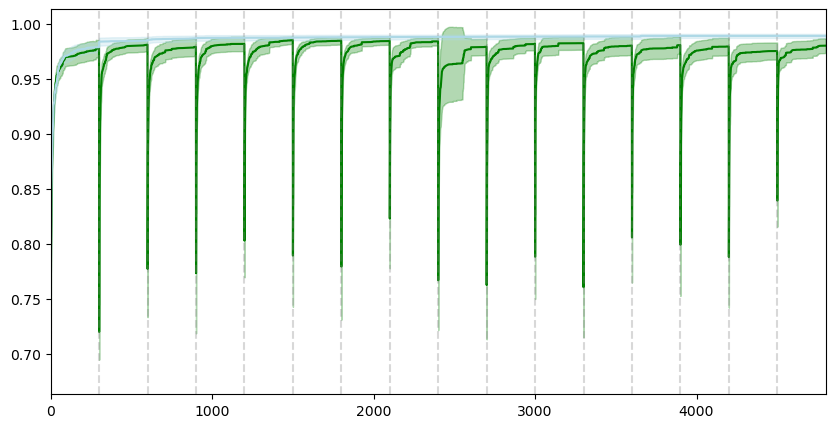

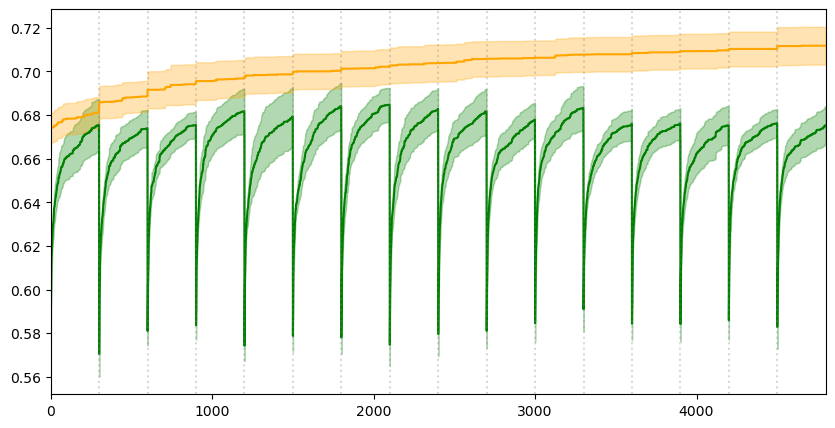

In [29]:
all_maxs=helper.get_fits([rule,rule], seed_ints, metric, root, season_len, num_reps, id_start, extrapolate=True)
all_maxs=np.array(all_maxs)
labels=["vari","env1","env2"]
colors = ["green", "lightblue", "orange"]
z_value = 1.96  # For a 95% confidence interval

print(np.array(vari_maxs).shape)

#plot all variable, together
fig, ax=plt.subplots(nrows=1,ncols=1, figsize=(10, 5),sharex=True) #sharey=True)
for i,m in enumerate(all_maxs[1:]):
    mean1 = np.mean(m, axis=0)
    stderr1 = np.std(m, axis=0) / np.sqrt(num_reps)
    ci_upper = mean1 + z_value * stderr1
    ci_lower = mean1 - z_value * stderr1
    ax.fill_between(range(len(mean1)), ci_lower, ci_upper, alpha=0.3, color = colors[1:][i])
    ax.plot(mean1, "-", label=labels[1:][i], color = colors[1:][i])
m=vari_maxs #all_maxs[0]
mean1 = np.mean(m, axis=0)
stderr1 = np.std(m, axis=0) / np.sqrt(num_reps)
ci_upper = mean1 + z_value * stderr1
ci_lower = mean1 - z_value * stderr1
ax.fill_between(range(len(mean1)), ci_lower, ci_upper, alpha=0.3,color=colors[0])
ax.plot(mean1, "-", label= labels[0], color=colors[0])
#ax.set_xlim(1000,1700)
ax.legend()
for j in range(0, len(mean1), season_len):
    if j % (season_len * 2) == 0:
        ax.axvline(j, linestyle="--", color="gray", alpha=0.3)
    else:
        ax.axvline(j, linestyle=":", color="gray", alpha=0.3)

'''
#put together with color
season1, season2, gens1, gens2 = helper.chunker_plotting(mean1, season_len = 300)
season1_std, season2_std, _, _ = helper.chunker_plotting(stderr1, season_len = 300)
fig, ax=plt.subplots(nrows=1,ncols=1, figsize=(10, 5),sharex=True) #sharey=True)
for i in range(len(gens1)):
    ax.plot(gens1[i], season1[i],color="C1")
    ax.fill_between(gens1[i], season1[i] - season1_std[i], season1[i] + season1_std[i], alpha=0.3,color="C1")
    ax.plot(gens2[i], season2[i],color="C2")
    ax.fill_between(gens2[i], season2[i] - season2_std[i], season2[i] + season2_std[i], alpha=0.3,color="C2")
for j in range(0, len(mean1), season_len):
    if j % (season_len * 2) == 0:
        ax.axvline(j, linestyle="--", color="gray", alpha=0.3)
    else:
        ax.axvline(j, linestyle=":", color="gray", alpha=0.3)
plt.show()
'''

#chunk it up!
season1, season2, chunked_gens1, chunked_gens2 = helper.chunker_plotting(mean1, season_len = 300)
season1 = np.reshape(season1, (season1.shape[0]*season1.shape[1]))
season2 = np.reshape(season2, (season2.shape[0]*season2.shape[1]))

season1_std, season2_std, _, _ = helper.chunker_plotting(stderr1, season_len = 300)
season1_std = np.reshape(season1_std, (season1_std.shape[0]*season1_std.shape[1]))
season2_std = np.reshape(season2_std, (season2_std.shape[0]*season2_std.shape[1]))

#chunk the statics too
chunked_gens1 = np.array([x for xs in chunked_gens1 for x in xs])
chunked_gens2 = np.array([x for xs in chunked_gens2 for x in xs])

fig, ax=plt.subplots(nrows=1,ncols=1, figsize=(10, 5),sharex=True) #sharey=True)
ax.plot(season1,color=colors[0])
ax.fill_between(range(len(season1)), season1 - z_value*season1_std, season1 + z_value*season1_std, alpha=0.3,color=colors[0])
for j in range(0, len(season1), season_len):
    if j % (season_len * 2) == 0:
        ax.axvline(j, linestyle="--", color="gray", alpha=0.3)
    else:
        ax.axvline(j, linestyle="--", color="gray", alpha=0.3)
mean1 = np.mean(all_maxs[1][:, chunked_gens1], axis=0) #all reps, only chunked gens
stderr1 = np.std(all_maxs[1][:, chunked_gens1], axis=0) / np.sqrt(num_reps)
ci_upper = mean1 + z_value * stderr1
ci_lower = mean1 - z_value * stderr1
ax.fill_between(range(len(mean1)), ci_lower, ci_upper, alpha=0.3, color = colors[1])
ax.plot(mean1, "-", label=labels[1], color = colors[1])
plt.xlim(0, len(season1))
#plt.ylim(0.8,0.9)
plt.show()

fig, ax=plt.subplots(nrows=1,ncols=1, figsize=(10, 5),sharex=True) #sharey=True)
ax.plot(season2,color=colors[0])
ax.fill_between(range(len(season2)), season2 - z_value*season2_std, season2 + z_value*season2_std, alpha=0.3,color=colors[0])
for j in range(0, len(season2), season_len):
    if j % (season_len * 2) == 0:
        ax.axvline(j, linestyle=":", color="gray", alpha=0.3)
    else:
        ax.axvline(j, linestyle=":", color="gray", alpha=0.3)
mean1 = np.mean(all_maxs[2][:, chunked_gens2], axis=0)
stderr1 = np.std(all_maxs[2][:, chunked_gens2], axis=0) / np.sqrt(num_reps)
ci_upper = mean1 + z_value * stderr1
ci_lower = mean1 - z_value * stderr1
ax.fill_between(range(len(mean1)), ci_lower, ci_upper, alpha=0.3, color = colors[2])
ax.plot(mean1, "-", label=labels[2], color = colors[2])
plt.xlim(0, len(season1))
#plt.ylim(0.9,1)
plt.show()

In [21]:
root = "~/Documents/GitHub/CA_GRN2/results_testing_saving/"
avail_metrics = ["avefits","maxfits","beststd","spec_pheno_stds", "pheno_stds","geno_stds"]
metric = avail_metrics[5]
rules = [rule,rule]
output=[np.loadtxt(os.path.expanduser(root+f"stats_{season_len}_{rules[0]}-{rules[1]}_{seed_ints[0]}-{seed_ints[1]}_{i+1}_{metric}.txt")) for i in range(1)]

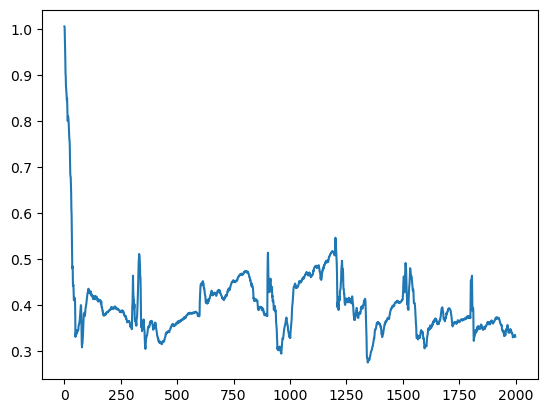

In [22]:
plt.plot(output[0])